# Necessary Imports

In [465]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [466]:
from multimode_expts.analysis_notebooks.expts_run_base import *

In [467]:
expts_base_inst = expts_run_base(data_path=r'H:\Shared drives\SLab\Multimode\experiment\250505_craqm', 
                            config_name='hardware_config_202505.yml',
                              exp_param_name='experiment_config.yml', qubit_i=0)

path:  H:\Shared drives\SLab\Multimode\experiment\250505_craqm
Data will be stored in H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data
Hardware configs will be read from C:\_Lib\python\multimode_expts\configs\hardware_config_202505.yml
Experiment params will be read from C:\_Lib\python\multimode_expts\configs\experiment_config.yml
<Pyro4.core.Proxy at 0x21ddb3bb490; not connected; for PYRO:obj_91b0485759464ea2bde6958e2d962759@192.168.137.101:46771>
Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python\\multimode_expts', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks\\bosonic', 'c:\\Users\\26049\\.conda\\envs\\slab

# Multiphoton Calibration

In [468]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_calib = MM_dual_rail_base(expts_base_inst.config_thisrun, expts_base_inst.soc)
# multiphoton_cfg_thisrun = AttrDict(deepcopy(mm_base_calib.multiphoton_cfg))
from fit_display_classes import GeneralFitting
from fitting_folder.wigner import WignerAnalysis
import qutip as qt

## functions for $\pi$-pulses for fock n

### Ramsey for the frequency

In [ ]:
def do_t2_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    step_size=0.05,
    if_ef=False,
    ef_init=True, # redundant
    start=0.01,
    expts=75,
    ramsey_freq=0.2,
    reps=250,
    rounds=1,
    qubits=[0],
    user_defined_freq=[False, 3568.2038290468167, 5304, 0.035],
    f0g1_cavity=0,
    normalize=False,
    active_reset=False,
    man_reset=True,
    storage_reset=False,
    prepulse=None,
    postpulse=None,
    pre_active_reset_pulse=False,
    gate_based=False,
    advance_phase=0,
    echoes=[False, 0],
    relax_delay=2500
):
    """Run the T2 Ramsey experiment with all config params as function arguments."""
    t2ramsey = expts_base_inst.meas.single_qubit.t2_ramsey.RamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='RamseyExperiment', config_file=config_path
    )

    t2ramsey.cfg = AttrDict(deepcopy(config_thisrun))
    checkEF = False
    qubit_ge_init = False
    qubit_ge_after = False
    if if_ef:
        checkEF = True
        qubit_ge_init = True if ef_init else False
        qubit_ge_after = True if ef_init else False

    t2ramsey.cfg.expt = {
        'start': start,
        'step': step_size,
        'expts': expts,
        'ramsey_freq': ramsey_freq,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'checkEF': checkEF,
        'user_defined_freq': user_defined_freq,
        'qubit_ge_init': qubit_ge_init,
        'qubit_ge_after': qubit_ge_after,
        'f0g1_cavity': f0g1_cavity,
        'normalize': normalize,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': False if pre_sweep_pulse is None else True if prepulse is None else prepulse,
        'postpulse': False if post_sweep_pulse is None else True if postpulse is None else postpulse,
        'pre_active_reset_pulse': pre_active_reset_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'post_sweep_pulse': post_sweep_pulse,
        'gate_based': gate_based,
        'advance_phase': advance_phase,
        'echoes': echoes
    }

    t2ramsey.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    t2ramsey.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import RamseyFitting
    t2ramsey_analysis = RamseyFitting(
        t2ramsey.data, config=t2ramsey.cfg,
    )
    return t2ramsey_analysis

### Rabi for the amplitude

In [ ]:
def do_amplitude_rabi(
    config_thisrun,
    expt_path,
    config_path,
    start=50,
    step=450,
    expts=75,
    reps=100,
    rounds=1,
    sigma_test=None,
    qubit=0,
    pulse_type='gauss',
    drag_beta=0.0,
    pulse_ge_init=False,
    pulse_ge_after=False,
    checkZZ=False,
    checkEF=False,
    qubits=[0],
    flat_length=0,
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=50,
    user_defined_freq=[False, 3568.203829046816],
    prepulse=False,
    pre_sweep_pulse=None,
    post_sweep_pulse=None,
    postpulse=False,
    gate_based=False,
    relax_delay=2500,
    if_ef=False
):
    """Run the amplitude Rabi experiment with all config params as function arguments."""
    amprabi = expts_base_inst.meas.single_qubit.amplitude_rabi.AmplitudeRabiExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='AmplitudeRabiExperiment', config_file=config_path
    )

    amprabi.cfg = AttrDict(deepcopy(config_thisrun))
    print(f"Amplitude Rabi Program with config: {amprabi.cfg.hw.soc.dacs}")
    pulse_ge = config_thisrun.device.qubit.pulses.pi_ge

    if sigma_test is None:
        sigma_test = pulse_ge.sigma[0]

    if if_ef:
        checkEF = True
        pulse_ge_init = True
        pulse_ge_after = True

    amprabi.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        sigma_test=sigma_test,
        qubit=qubit,
        pulse_type=pulse_type,
        drag_beta=drag_beta,
        pulse_ge_init=pulse_ge_init,
        pulse_ge_after=pulse_ge_after,
        checkZZ=checkZZ,
        checkEF=checkEF,
        qubits=qubits,
        flat_length=flat_length,
        normalize=normalize,
        single_shot=single_shot,
        singleshot_reps=singleshot_reps,
        span=span,
        user_defined_freq=user_defined_freq,
        prepulse=prepulse,
        postpulse=postpulse,
        pre_sweep_pulse=pre_sweep_pulse if pre_sweep_pulse is not None else [],
        post_sweep_pulse=post_sweep_pulse if post_sweep_pulse is not None else [],
        gate_based=gate_based
    )
    amprabi.cfg.device.readout.relax_delay = [relax_delay]
    amprabi.go(analyze=False, display=False, progress=True, save=True)
    return amprabi

### Error amplification

In [ ]:
def do_error_amplification(
    config_thisrun,
    expt_path,
    config_path,
    reps=100,
    rounds=1,
    qubit=0,
    n_pulses=10,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    relax_delay=2500, 
    start = 0,
    expts = 10,
    step = 100,
    parameter_to_test = 'gain',
    pulse_type=['qubit', 'ge', 'pi', 0],
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubit': qubit,
        'qubits': [qubit],
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'start': start,
        'expts': expts,
        'step': step,
        'n_pulses': n_pulses,
        'pulse_type': pulse_type,
        'parameter_to_test': parameter_to_test,
        'rounds': rounds,

    }
    error_amp_exp = expts_base_inst.meas.single_qubit.error_amplification.ErrorAmplificationExperiment(
    soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path,
      prefix='ErrorAmplificationExperiment', config_file=expts_base_inst.config_file)
    error_amp_exp.cfg = AttrDict(deepcopy(config_thisrun))
    error_amp_exp.cfg.expt = expt_cfg
    error_amp_exp.go(analyze=False, display=False, progress=True, save=True)
    return error_amp_exp

## define the transition we want to calibrate

In [ ]:
transition = 'e1-f1'
_transition = transition[0] + 'n' + '-' + transition[3] + 'n'
i = int(transition[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
postpulse = False
post_pulse = []
if transition[0] == 'e':
    pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
    postpulse = True,
    post_pulse = [['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0]]  # post pulse is the same as prepulse
    # post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, multiphoton_cfg_thisrun).pulse.tolist()
    post_pulse = mm_base_calib.get_prepulse_creator(post_pulse, expts_base_inst.config_thisrun).pulse.tolist()

pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()

### Ramsey

In [ ]:
t2ramsey_any = do_t2_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file, 
    user_defined_freq=[True,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][1],
                      # 3428.4,
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][1],
                      expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][1]],
    prepulse = True, 
    postpulse = postpulse,
    gate_based = False,
    pre_sweep_pulse = pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    ramsey_freq=2,
    step_size=0.01,
    expts=50,
)

In [ ]:
t2ramsey_any.analyze()
# fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# t2ramsey_any.analyze(fitparams=[500, 0.05, None, None, None, None])
t2ramsey_any.display()

In [ ]:
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print("Qubit frequency before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']  += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['frequency'])
# print('Updated qubit frequency to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency'])

print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print("Qubit frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = 3428.1548845179946
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] += min(t2ramsey_any.data['f_adjust_ramsey_avgi'])
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = 3428.1548845179946
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
print('Updated qubit frequency to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

### Rabi

In [ ]:
amprabi_any = do_amplitude_rabi(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    # sigma_test=multiphoton_cfg_thisrun.pulses['pi_' + transition]['sigma'],
    sigma_test= expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['sigma'][i],
    qubit=0,
    # user_defined_freq=[True, multiphoton_cfg_thisrun.pulses['pi_' + transition]['frequency']],
    user_defined_freq=[True, expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][1]],
    prepulse=True,
    postpulse=postpulse,
    gate_based=False,
    pre_sweep_pulse=pre_sweep_pulse,
    post_sweep_pulse=post_pulse,
    step=100,expts=100,reps=100
)

In [ ]:
 # fitparams=[amp, freq (non-angular), phase (deg), decay time, amp offset, decay time offset]
# amprabi_any.analyze(fitparams=[np.max(amprabi_any.data['amps']), 0.000017, 10, None, -100, None])
amprabi_any.analyze()
amprabi_any.display(title_str='Amplitude Rabi_ge', save_fig=True)

In [ ]:
# print("Qubit hpi gain before update:",multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'] = amprabi_any.data['hpi_gain_avgi']
# print('Updated hpi gain to:',multiphoton_cfg_thisrun.pulses['hpi_' + transition]['gain'])

# print("Qubit pi gain before update:",multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])
# multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'] = amprabi_any.data['pi_gain_avgi']
# print('Updated pi gain to:',multiphoton_cfg_thisrun.pulses['pi_' + transition]['gain'])

print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = amprabi_any.data['hpi_gain_avgi']
print('Updated hpi gain to:',expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
print("Qubit pi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = amprabi_any.data['pi_gain_avgi']
print('Updated pi gain to:',expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

### Error amplification $\pi$ pulse

### Frequency

In [ ]:
expts = 25
band = 1
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='frequency',
)

In [ ]:
err_amp.analyze()
err_amp.display()

In [ ]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency'][i])

In [ ]:
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['frequency']

### Amplitude

In [ ]:
band = 200
expts = 25
gain_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'pi', 0],
    parameter_to_test='gain',
)

In [ ]:
err_amp.analyze()
err_amp.display()

In [ ]:
print("Qubit pi amplitude before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i] = int(err_amp.data['fit_avgi'][2])
print("Qubit pi amplitude after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_transition]['gain'][i])

### Error amplification $\pi/2$ pulse

### Frequency

In [ ]:
expts = 25
band = 2
# expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['sigma'][i] = 0.035
freq_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='frequency',
)

In [ ]:
err_amp.analyze()
err_amp.display()

In [ ]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['frequency'][i])

### Amplitude

In [ ]:
band = 1000
expts = 25
# gain_start = 18000/2 - band
gain_start = expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] - band
step = 2 * band / expts
print(f'Gain start: {gain_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 10,
    expts=expts,
    start=gain_start,
    step=step,
    pulse_type=['multiphoton', transition, 'hpi', 0],
    parameter_to_test='gain',
)

In [ ]:
err_amp.analyze()
err_amp.display()

In [ ]:
print("Qubit hpi gain before update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])
expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i] = int(err_amp.data['fit_avgi'][2])
print("Qubit hpi gain after update:",expts_base_inst.config_thisrun.device.multiphoton['hpi'][_transition]['gain'][i])

## Define the sideband we want to calibrate

In [ ]:
sideband = 'f1-g2'
_sideband = sideband[0] + 'n' + '-' + sideband[3] + 'n+1'
i = int(sideband[1])
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=i)
print(f"pre_sweep_pulse: {pre_sweep_pulse}")
pre_sweep_pulse.append(['multiphoton', 'g'+str(i)+'-e'+str(i), 'pi', 0])
pre_sweep_pulse.append(['multiphoton', 'e'+str(i)+'-f'+str(i), 'pi', 0])
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()

In [ ]:
def do_pulse_probe_any(
    config_thisrun,
    ds_thisrun,
    man_mode_no=1,
    start=2009,
    step=0.01,
    expts=500,
    reps=100,
    rounds=1,
    length=1,
    gain=5000,
    pulse_type='gaussian',
    qubit_f=False,
    qubits=[0],
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    relax_delay=200
):
    """
    Run the Pulse Probe F0g1 Spectroscopy experiment with configurable parameters.
    """
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_f0g1_spectroscopy.PulseProbeF0g1SpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeF0g1SpectroscopyExperiment', config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    if start is None:
        start = ds_thisrun.get_freq('M' + str(man_mode_no)) - 5
    if pre_sweep_pulse is None:
        pre_sweep_pulse = [[3569.4827896982997], [11161], [0], [0], [2], ['g'], [0.035]]

    qspec.cfg.expt = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'length': length,
        'gain': gain,
        'pulse_type': pulse_type,
        'qubit_f': qubit_f,
        'qubits': qubits,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }

    qspec.cfg.device.readout.relax_delay = [relax_delay]
    qspec.go(analyze=False, display=False, progress=True, save=True)
    return qspec

def analyze_and_display_pulse_probe_any(qspec):
    from multimode_expts.fit_display_classes import Spectroscopy
    spec_analysis = Spectroscopy(
        qspec.data)
    spec_analysis.analyze(fit=True)
    spec_analysis.display()

In [ ]:
man_spec = do_pulse_probe_any(expts_base_inst.config_thisrun,
                                expts_base_inst.ds_thisrun, 
                                man_mode_no = 1, 
                                start = 2009, 
                                step=0.01,
                                expts=500,
                                length=0.8,
                                prepulse = True, pre_sweep_pulse=pre_sweep_pulse)
analyze_and_display_pulse_probe_any(man_spec)

In [ ]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_spec.data['fit_avgi'][2]
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_spec.data['fit_avgi'][2]
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

### Quick chevron

In [ ]:
def do_length_rabi_any_sweep(
    config_thisrun,
    expt_path,
    config_path,
    freq_start,
    freq_stop,
    freq_step,
    start=2,
    step=0.1,
    qubits=[0],
    expts=25,
    reps=100,
    rounds=1,
    gain=8000,
    ramp_sigma=0.005,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    check_man_reset=[False, 0],
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    pre_sweep_pulse=None,
    post_sweep_pulse=post_pulse,
    err_amp_reps=0
):
    """Run the Length Rabi General F0g1 Experiment Sweep with configurable parameters."""
    from multimode_expts.sequential_experiment_classes import man_f0g1_class
    experiment_class = man_f0g1_class
    sweep_experiment_name = 'length_rabi_f0g1_sweep'
    class_for_exp = experiment_class(
        soccfg=expts_base_inst.soc,
        path=expt_path,
        prefix=sweep_experiment_name,
        config_file=config_path,
        exp_param_file=expts_base_inst.exp_param_file,
        config_thisrun=config_thisrun
    )

    class_for_exp.loaded[sweep_experiment_name] = {
        'freq_start': freq_start,
        'freq_stop': freq_stop,
        'freq_step': freq_step,
        'start': start,
        'step': step,
        'qubits': qubits,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'gain': gain,
        'ramp_sigma': ramp_sigma,
        'use_arb_waveform': use_arb_waveform,
        'pi_ge_before': pi_ge_before,
        'pi_ef_before': pi_ef_before,
        'pi_ge_after': pi_ge_after,
        'normalize': normalize,
        'active_reset': active_reset,
        'check_man_reset': check_man_reset,
        'check_man_reset_pi': check_man_reset_pi,
        'prepulse': prepulse,
        'postpulse': postpulse,
        'post_sweep_pulse': post_pulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'err_amp_reps': err_amp_reps,
    }
    return eval('class_for_exp.run_sweep')(sweep_experiment_name=sweep_experiment_name)


In [ ]:
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain']

In [ ]:
# guess_freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency']
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i] = 5000
guess_freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i]
freq_start = guess_freq- 0.5
freq_stop = guess_freq + 0.5
# freq_start = guess_freq- 0.1
# freq_stop = guess_freq + 0.1
freq_step = 0.2
man_chevrons = do_length_rabi_any_sweep(expts_base_inst.config_thisrun, expts_base_inst.expt_path, expts_base_inst.config_file, 
                                                freq_start, freq_stop, freq_step,
                                                prepulse = True, 
                                                gain=expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                                pre_sweep_pulse= pre_sweep_pulse,
                                                postpulse = postpulse ,
                                                post_sweep_pulse=post_pulse,
                                                )

In [ ]:
# print("Transition frequency before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'] =  man_chevrons.results['best_frequency_contrast']
# print('Updated transition frequency to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'])

print("Transition frequency before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = man_chevrons.results['best_frequency_contrast']
print('Updated transition frequency to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

### Length rabi first round

In [ ]:
def do_length_rabi_f0g1_general(
    config_thisrun,
    ds_thisrun,
    expt_path,
    config_path,
    man_mode_no=1,
    start=None,
    step=0.045,
    qubits=[0],
    expts=50,
    reps=100,
    rounds=1,
    gain=8000,
    freq=None,
    use_arb_waveform=False,
    pi_ge_before=False,
    pi_ef_before=False,
    pi_ge_after=False,
    normalize=False,
    active_reset=False,
    man_reset=True,
    stor_reset=True,
    check_man_reset=[False, 0],
    swap_lossy=False,
    check_man_reset_pi=[],
    prepulse=True,
    postpulse=postpulse,
    post_sweep_pulse=None,
    pre_sweep_pulse=None,
    err_amp_reps=0,
    relax_delay=2500
):
    """
    Run the Length Rabi General F0g1 Experiment with all config params as function arguments.
    """
    length_rabi = expts_base_inst.meas.single_qubit.length_rabi_f0g1_general.LengthRabiGeneralF0g1Experiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='LengthRabiGeneralF0g1Experiment', config_file=config_path
    )

    length_rabi.cfg = AttrDict(deepcopy(config_thisrun))

    if freq is None:
        freq = ds_thisrun.get_freq('M' + str(man_mode_no))
    if start is None:
        start = expts_base_inst.soc.cycles2us(3)
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []

    print('gain', gain)

    length_rabi.cfg.expt = dict(
        start=start,
        step=step,
        qubits=qubits,
        expts=expts,
        reps=reps,
        rounds=rounds,
        gain=gain,
        freq=freq,
        use_arb_waveform=use_arb_waveform,
        pi_ge_before=pi_ge_before,
        pi_ef_before=pi_ef_before,
        pi_ge_after=pi_ge_after,
        normalize=normalize,
        active_reset=active_reset,
        man_reset=man_reset,
        stor_reset=stor_reset,
        check_man_reset=check_man_reset,
        swap_lossy=swap_lossy,
        check_man_reset_pi=check_man_reset_pi,
        prepulse=prepulse,
        pre_sweep_pulse=pre_sweep_pulse,
        postpulse=postpulse,
        post_sweep_pulse= post_sweep_pulse,
        err_amp_reps=err_amp_reps,
    )

    length_rabi.cfg.device.readout.relax_delay = [relax_delay]
    length_rabi.go(analyze=False, display=False, progress=True, save=True)

    from multimode_expts.fit_display_classes import LengthRabiFitting
    length_rabi_analysis = LengthRabiFitting(length_rabi.data, config=length_rabi.cfg)
    length_rabi_analysis.analyze()
    length_rabi_analysis.display(title_str='Length Rabi General F0g1')

    return length_rabi_analysis

In [ ]:

len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              # gain = 1000,
                                              gain = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )
        

In [ ]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

### Error amplification

In [ ]:
expts = 50
band = 0.25
# expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][0] = 0.5491206701698654
freq_start = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] - band
# freq_start = 2011 - band
step = 2 * band / expts
print(f'Frequency start: {freq_start}, Step: {step}')

err_amp = do_error_amplification(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    reps=100,
    rounds=1,
    n_pulses = 7,
    expts=expts,
    start=freq_start,
    step=step,
    pulse_type=['multiphoton', sideband, 'pi', 0],
    parameter_to_test='frequency',
)

In [ ]:
err_amp.analyze(state_fin='e')
err_amp.display()

In [ ]:
print("Qubit pi frequency before update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i] = err_amp.data['fit_avgi'][2]
print("Qubit pi frequency after update:",expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i])

### Length Rabi

In [ ]:
stop = 1.5 * expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i]
expts = 100
step = stop / expts


len_rabis_mans = do_length_rabi_f0g1_general(expts_base_inst.config_thisrun, expts_base_inst.ds_thisrun,
                                              expts_base_inst.expt_path, expts_base_inst.config_file, man_mode_no= 1,
                                              step=step, expts=expts,
                                              gain = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['gain'][i],
                                            #   freq =  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['frequency'],
                                              freq = expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['frequency'][i],
                                              prepulse=True,pre_sweep_pulse=pre_sweep_pulse, postpulse=postpulse, post_sweep_pulse=post_pulse
                                              )

In [ ]:
# print("Transition length before update:",  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
# multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'] = len_rabis_mans.results['pi_length']
# print('Updated transition length to:',  multiphoton_cfg_thisrun.pulses['pi_' + sideband]['length'])
print("Transition length before update:",  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])
expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i] = len_rabis_mans.results['pi_length']
print('Updated transition length to:',  expts_base_inst.config_thisrun.device.multiphoton['pi'][_sideband]['length'][i])

## Single shot
To check broadband pulses and recalibrate phase

### Some fake optimal control pulse to test

In [ ]:
from scipy import special
sigma_qb = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.sigma[0]
sigma_cav = expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0]
gain_qb = expts_base_inst.config_thisrun.device.qubit.pulses.pi_ge.gain[0]
n=4
# t_vec = np.linspace(0 ,n*sigma_qb ,1000)
t_vec = np.linspace(0 ,n*sigma_cav ,1000)
theta_to_gain = np.pi/2/gain_qb
alpha_to_gain = expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0]

# drive_to_gain_qb = sigma_qb * np.sqrt(2*np.pi)/theta_to_gain * special.erf(n/2/np.sqrt(2))
# drive_to_gain_cav = sigma_cav * np.sqrt(2*np.pi)/alpha_to_gain * special.erf(n/2/np.sqrt(2))
drive_to_gain_qb = sigma_qb * np.sqrt(np.pi)/theta_to_gain * special.erf(n/2)
drive_to_gain_cav = sigma_cav * np.sqrt(np.pi)/alpha_to_gain * special.erf(n/2)

# epsilon_pi = np.sqrt(np.pi/8/sigma_qb**2) * 1/special.erf(n/2/np.sqrt(2))
rot = 0.5
epsilon_pi = np.sqrt(np.pi/4/sigma_qb**2) * 1/special.erf(n/2) * rot
alpha = 1
epsilon_1 = 1j*((1)*alpha)/(np.sqrt(np.pi)*sigma_cav*special.erf(n/2))

# iq = np.exp(-(t_vec - n*sigma_qb/2)**2/(2*sigma_qb**2)) * epsilon_pi * drive_to_gain_qb
# iq = np.exp(-(t_vec - n*sigma_qb/2)**2/(sigma_qb**2)) * epsilon_pi
iq = np.zeros_like(t_vec)
qq = np.zeros_like(iq)
ic = np.real(np.exp(-(t_vec - n*sigma_cav/2)**2/(sigma_cav**2)) * epsilon_1)
qc = np.imag(np.exp(-(t_vec - n*sigma_cav/2)**2/(sigma_cav**2)) * epsilon_1)
# ic =np.zeros_like(t_vec)
# qc =np.zeros_like(t_vec)

# pad with 100ns of zeros at the end
# dt = t_vec[1] - t_vec[0]
# t_vec = np.append(t_vec, t_vec[-1] + dt * np.arange(1, 8001))
# iq = np.append(iq, np.zeros(8000))
# qq = np.append(qq, np.zeros(8000))
# ic = np.append(ic, np.zeros(8000))
# qc = np.append(qc, np.zeros(8000))

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
ax.plot(t_vec, iq, label='IQ')
ax.plot(t_vec, qq, label='QQ')
ax.plot(t_vec, ic, label='IC')
ax.plot(t_vec, qc, label='QC')
ax.set_xlabel('Time (us)')
ax.set_ylabel('Amplitude')
ax.set_title('Optimal Control Pulse for Qubit')
ax.legend()



data = {
    'times': t_vec*1e3,
    'I_q' : iq/2/np.pi*1e-3,
    'Q_q' : qq/2/np.pi*1e-3,
    'I_c' : ic/2/np.pi*1e-3,
    'Q_c' : qc/2/np.pi*1e-3
}

filepath = "H://Shared drives//SLab//Multimode//optimal_control//"
filename = "test_pi"
# save in the npz format
np.savez_compressed(filepath + filename, **data)


In [470]:
def do_single_shot(
    config_thisrun,
    expt_path,
    config_path,
    qubits=[0],
    reps=5000,
    check_f=False,
    active_reset=True,
    man_reset=False,
    storage_reset=False,
    qubit=0,
    pulse_manipulate=False,
    cavity_freq=4984.373226159381,
    cavity_gain=800,
    cavity_length=2,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    relax_delay=250
):
    """Run the single shot experiment with configurable parameters."""

   
    hstgrm = expts_base_inst.meas.single_qubit.single_shot.HistogramExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramExperiment', config_file=config_path
    )

    hstgrm.cfg = AttrDict(deepcopy(config_thisrun))

    hstgrm.cfg.expt = {
        'qubits': qubits,
        'reps': reps,
        'check_f': check_f,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'qubit': qubit,
        'pulse_manipulate': pulse_manipulate,
        'cavity_freq': cavity_freq,
        'cavity_gain': cavity_gain,
        'cavity_length': cavity_length,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
    }

    hstgrm.cfg.device.readout.relax_delay = [relax_delay]  # Wait time between experiments [us]
    hstgrm.go(analyze=False, display=False, progress=True, save=True)
    from multimode_expts.fit_display_classes import Histogram
    
    hist_analysis = Histogram(
            hstgrm.data, verbose=True,
             span=300, threshold=None, config=hstgrm.cfg,
        )
    return hstgrm, hist_analysis


def update_single_shot(hist_analysis, config_thisrun):
    """Update the configuration based on single shot experiment results."""
    
    hist_analysis.analyze(plot = True)
    fids = hist_analysis.results['fids']
    confusion_matrix = hist_analysis.results['confusion_matrix']
    thresholds_new = hist_analysis.results['thresholds']
    angle = hist_analysis.results['angle']
    print(fids)

    config_thisrun.device.readout.phase = [config_thisrun.device.readout.phase[0] + angle]
    config_thisrun.device.readout.threshold = thresholds_new
    config_thisrun.device.readout.threshold_list = [thresholds_new]
    config_thisrun.device.readout.Ie = np.median(hist_analysis.data['Ie_rot'])
    config_thisrun.device.readout.Ig = np.median(hist_analysis.data['Ig_rot'])
    if hist_analysis.cfg.expt.active_reset:
        config_thisrun.device.readout.confusion_matrix_with_active_reset = confusion_matrix
    else:
        config_thisrun.device.readout.confusion_matrix_without_reset = confusion_matrix
    print('Updated readout!')

In [471]:
prepulse = [
     # ['qubit', 'ge', 'pi', 0],
     ['optimal_control', 'test', '2', [0, 0]]
     ]
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
# gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[1])
# print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][0]= gain_qb
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[1][1]][prepulse[1][2]]['gain'][1]= gain_cav
prepulse_seq = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()
print(f'Prepulse: {prepulse_seq}')

Gain for qubit: 850, Gain for cavity: 7213
Prepulse: [[3571.6994214615424, 4984.779973902164], [850, 7213], [0, 0], [0.0, 0.0], [2, 3], [['opt_cont', 'test', '2'], ['opt_cont', 'test', '2']], [0, 0]]


In [472]:
hstgrm = do_single_shot(config_thisrun=expts_base_inst.config_thisrun,expt_path=expts_base_inst.expt_path,config_path=expts_base_inst.config_file, 
                        reps = 5000, active_reset=False,
                        prepulse=False,
                        gate_based=False,
                        check_f=False,
                        pre_sweep_pulse=prepulse_seq,
                        relax_delay = 2500)

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00351_HistogramExperiment.h5
{'device': {'qubit': {'T1': [486.46448644846816], 'f_ge': [3571.709750355705], 'f_ef': [3428.4457610447353], 'ramp_sigma': [0.005], 'ramp_sigma_num': [3.0], 'pulses': {'pi_ge': {'gain': [3445], 'sigma': [0.035], 'length': [0.0], 'type': ['gauss']}, 'hpi_ge': {'gain': [1701], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'pi_ef': {'gain': [2770], 'length': [0.0], 'sigma': [0.035], 'type': ['gauss']}, 'hpi_ef': {'gain': [1318], 'sigma': [0.035], 'type': ['gauss']}, 'slow_pi_ge': {'gain': [15], 'sigma': [0.1], 'length': [10], 'type': ['flat_top']}}, 'T1_ef': [144.16571854782674]}, 'readout': {'trig_offset': [450], 'frequency': [749.0683556354792], 'gain': [800], 'phase': [-68.34629972735932], 'threshold': [-55.25421651086265], 'threshold_list': [[-55.25421651086265]], 'man1_drive_list': [0.0], 'man2_drive_list': [0.0], 'readout_length': [1.5], 'relax_delay': [2500], 'confusion_matrix_

Unrotated:
Ig -94.2521645021645 +/- 30.436227963543015 	 Qg 0.36904761904761907 +/- 26.85610176108103 	 Amp g 94.25288700877125
Ie 16.825757575757578 +/- 33.89342918196265 	 Qe 12.575757575757574 +/- 25.950777980442407 	 Amp e 21.006089512386346
updating temp data
Rotated:
Ig -93.80757867065911 +/- 30.660445156771477 	 Qg 10.54115790166927 +/- 26.59983603781997 	 Amp g 94.39797575138898
Ie 18.373259815447593 +/- 34.027768149063895 	 Qe 11.072918822615872 +/- 25.774375148516878 	 Amp e 21.451951134994275


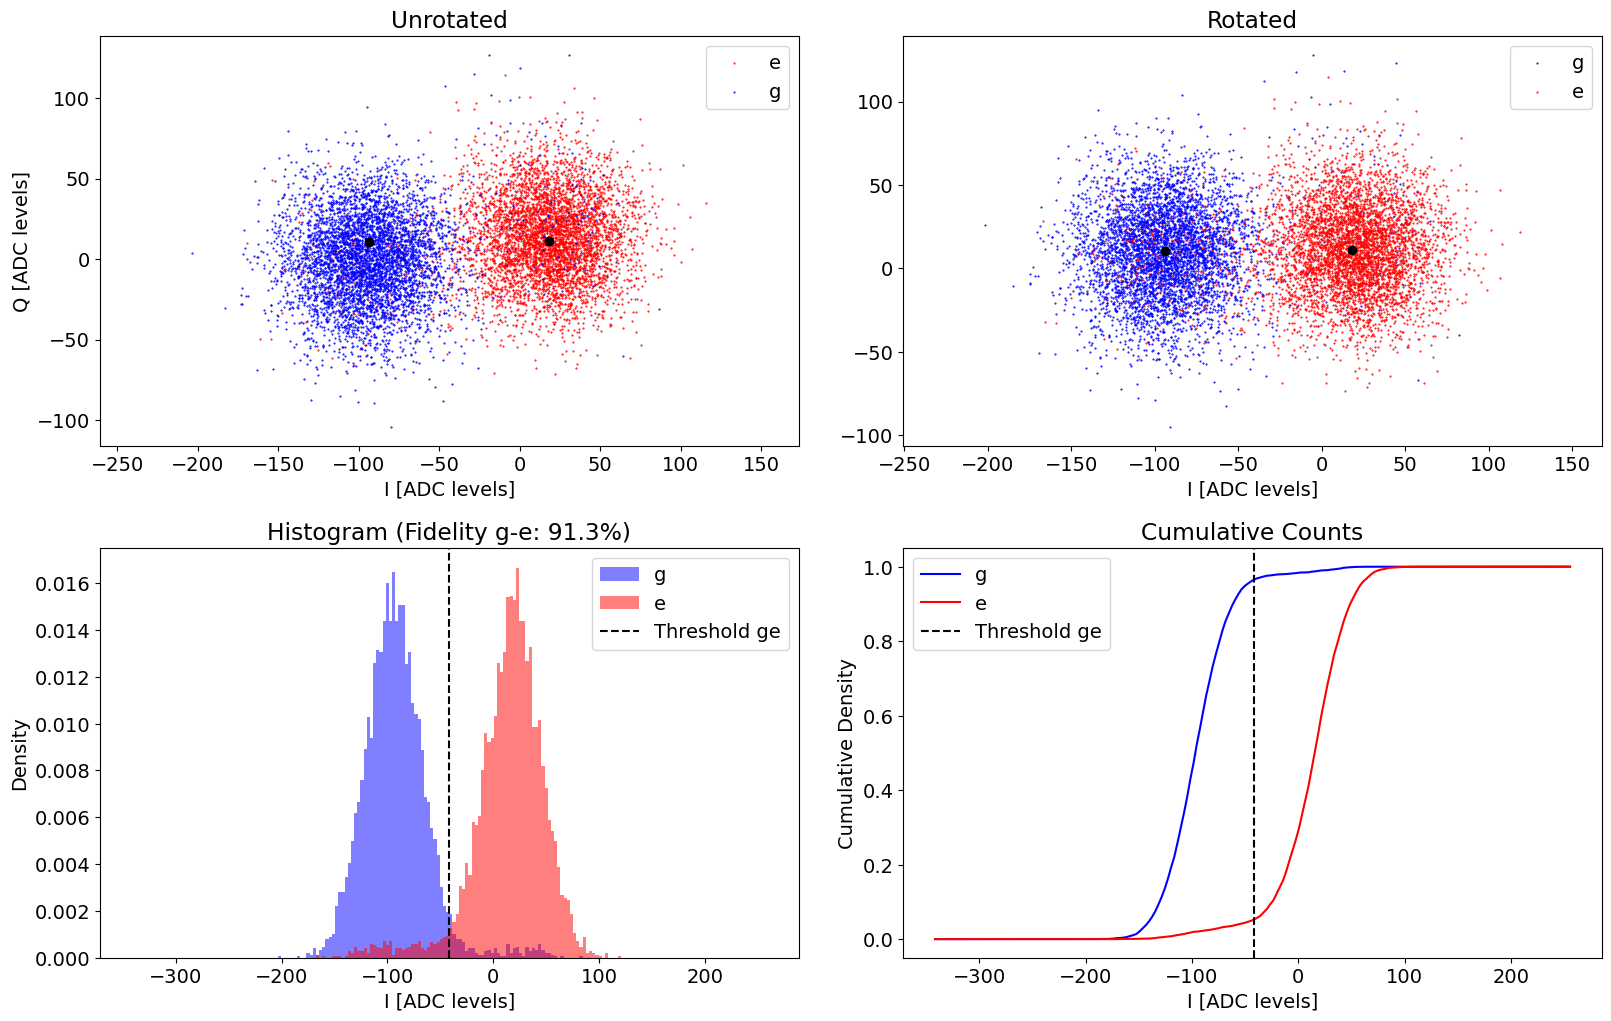

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-27_09-13-27_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-27.md


In [473]:
hstgrm[1].analyze(plot = True)

Unrotated:
Ig -94.2521645021645 +/- 30.436227963543015 	 Qg 0.36904761904761907 +/- 26.85610176108103 	 Amp g 94.25288700877125
Ie 16.825757575757578 +/- 33.89342918196265 	 Qe 12.575757575757574 +/- 25.950777980442407 	 Amp e 21.006089512386346
updating temp data
Rotated:
Ig -93.80757867065911 +/- 30.660445156771477 	 Qg 10.54115790166927 +/- 26.59983603781997 	 Amp g 94.39797575138898
Ie 18.373259815447593 +/- 34.027768149063895 	 Qe 11.072918822615872 +/- 25.774375148516878 	 Amp e 21.451951134994275


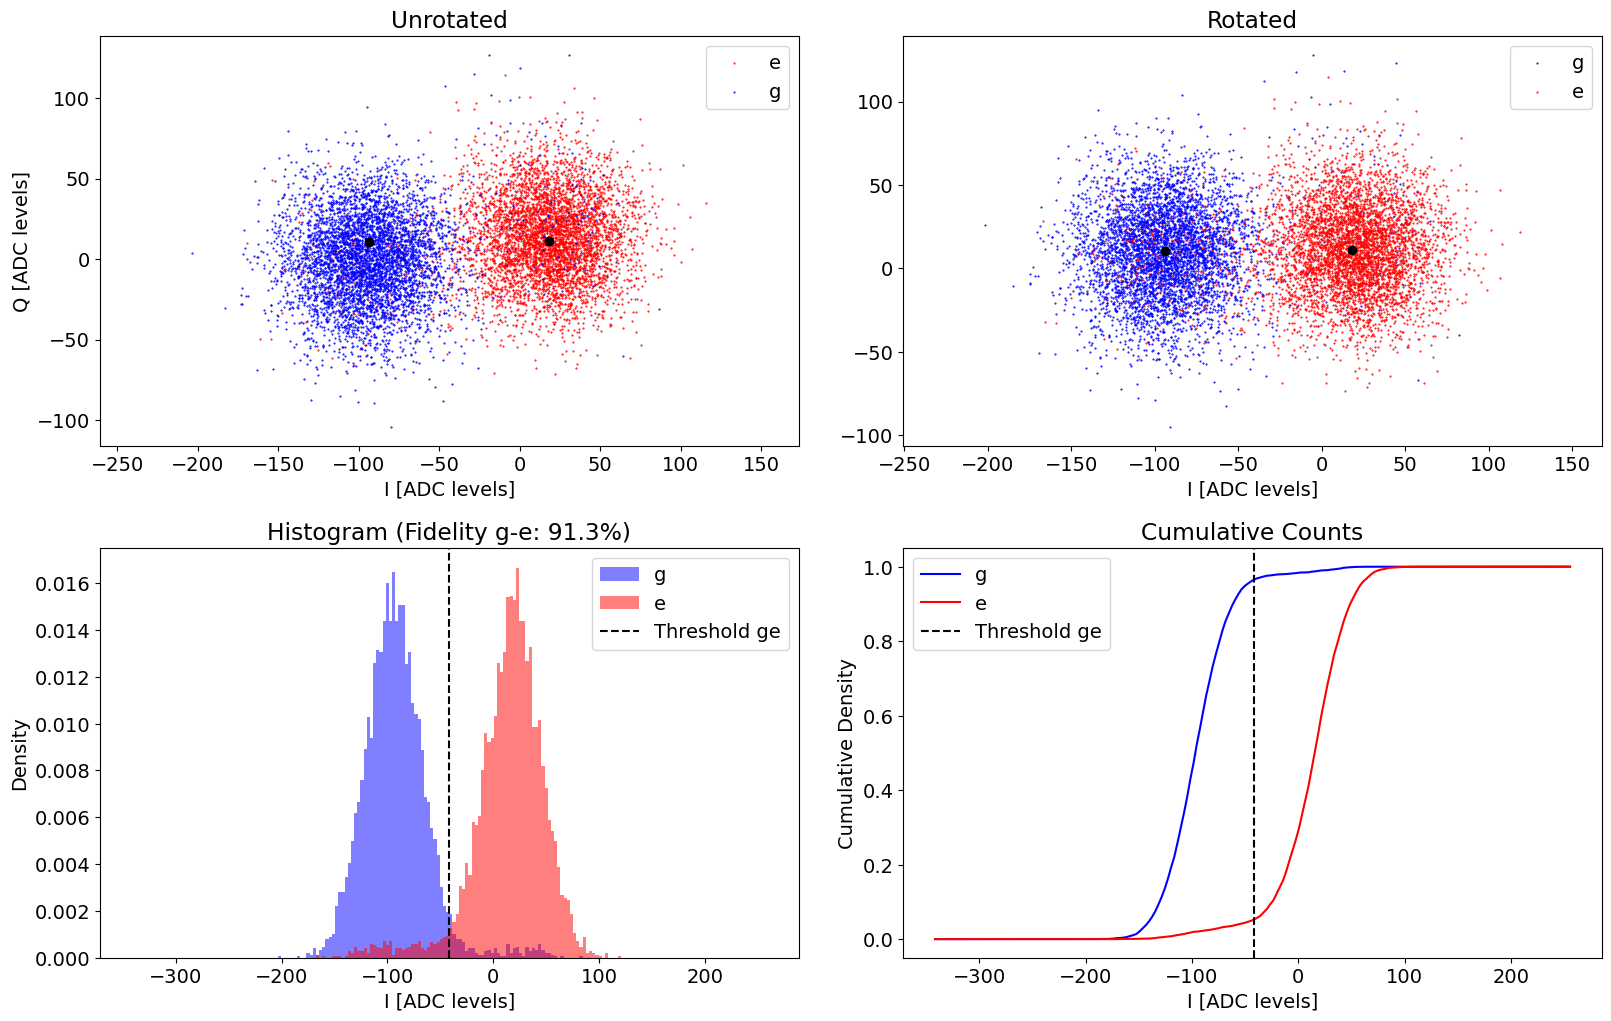

supertitle is  None
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-27_09-13-32_histogram.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-27.md
[0.9130000000000003]
Updated readout!
Single shot done!


In [474]:
update_single_shot(hstgrm[1], expts_base_inst.config_thisrun)
print('Single shot done!')

## Photon Number Resolved  Spectroscopy

This is used to check that the fock states are well prepared before we do the tomography

In [ ]:
def do_pulse_probe(
    config_thisrun, 
    start=3560,  # [MHz]
    step=0.1,  # min step ~1 MHz
    expts=200,  # Number of experiments stepping from start
    reps=2000,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=1,  # Qubit probe constant pulse length [us]
    gain=400,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=False,
    pre_sweep_pulse=[],
    gate_based=False,
    relax_delay=250,  # Wait time between experiments [us]
    ): 
    qspec = expts_base_inst.meas.single_qubit.pulse_probe_spectroscopy.PulseProbeSpectroscopyExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, prefix='PulseProbeSpectroscopyExperiment', 
        config_file=expts_base_inst.config_file
    )

    qspec.cfg = AttrDict(deepcopy(config_thisrun))

    qspec.cfg.expt = dict(
        qubits = [0],
        start=start,
        step=step,
        expts=expts,
        reps=reps,
        rounds=rounds,
        length=length,
        gain=gain,
        sigma=sigma,
        qubit=qubit,
        prepulse = prepulse, 
        pre_sweep_pulse = pre_sweep_pulse,
        gate_based = gate_based,
    )

    qspec.cfg.device.readout.relax_delay = [relax_delay] # Wait time between experiments [us]
    qspec.go(analyze=True, display=True, progress=True, save=True)
    return qspec

In [ ]:
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=1, photon_no=0)
# pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, multiphoton_cfg_thisrun).pulse.tolist()
pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
print(f"pre_sweep_pulse: {pre_sweep_pulse}")

In [ ]:
qspec= do_pulse_probe(
    config_thisrun=expts_base_inst.config_thisrun,
    start=expts_base_inst.config_thisrun.device.qubit.f_ge[0]-1.5,  # [MHz]
    step=0.020,  # min step ~1 MHz
    expts=100,  # Number of experiments stepping from start
    reps=30,  # Number of averages per point
    rounds=1,  # Number of start to finish sweeps to average over
    length=10,  # Qubit probe constant pulse length [us]
    gain=5,  # Qubit pulse gain
    sigma=0.1,  # Qubit flat top sigma
    qubit=0,
    prepulse=True,
    pre_sweep_pulse=pre_sweep_pulse,
    gate_based=False,
    relax_delay=8000  # Wait time between experiments [us]
)

# Setting up the Wigner tomography

## Parity Delay

In [ ]:
def do_parity_delay(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,
    step=0.05,
    expts=50,
    reps=250,
    rounds=1,
    qubits=[0],
    prepulse=True,
    parity_fast=True,
    normalize=False,
    active_reset=False,
    man_reset=True,
    gate_based=False,
    storage_reset=True,
    pre_sweep_pulse=[],
    man_mode_no=1,
    relax_delay=2500
):
    print("Prepulse:", pre_sweep_pulse)

    pre_sweep_pulse = mm_base_calib.get_prepulse_creator(pre_sweep_pulse, expts_base_inst.config_thisrun).pulse.tolist()
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubits,
        'prepulse': prepulse,
        'normalize': normalize,
        'active_reset': active_reset,
        'parity_fast': parity_fast,
        'man_reset': man_reset,
        'gate_based': gate_based,
        'storage_reset': storage_reset,
        'pre_sweep_pulse': pre_sweep_pulse,
    }
    # print("expt_path:", expt_path)
    # print("config_path:", config_path)
    
    
    parity_delay_exp = expts_base_inst.meas.single_qubit.parity_delay.ParityDelayExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityDelayExperiment', config_file=config_path
    )
    parity_delay_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_delay_exp.cfg.expt = expt_cfg
    parity_delay_exp.cfg.device.readout.relax_delay = [relax_delay] 
    parity_delay_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_delay_exp


### Calibrate first the AC stark shift

Manipulate in 0, qubit should not rotate

In [ ]:
pre_sweep_pulse = []
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    parity_fast=True,
    config_path=expts_base_inst.config_file,
    pre_sweep_pulse=pre_sweep_pulse,
    )

In [ ]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
length_rabi_analysis.analyze(fitparams = [100, 0.5, -500, None, None, None])
# length_rabi_analysis.analyze()
length_rabi_analysis.display(title_str='Length Rabi General F0g1')
print(np.max(parity_delay_exp.data['avgi']), np.min(parity_delay_exp.data['avgi']))

In [ ]:
freq = length_rabi_analysis.data['fit_avgi'][1]
print('AC Stark frequency:', freq)
expts_base_inst.config_thisrun.device.manipulate.revival_stark_shift[0] = -freq

### Now parity length after the AC stark shift is calibrated

In [ ]:
pre_sweep_pulse = mm_base_calib.prep_man_photon(man_no=0, photon_no=1)
parity_delay_exp = do_parity_delay(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    parity_fast=True,
    config_path=expts_base_inst.config_file,
    pre_sweep_pulse=pre_sweep_pulse,
    )

In [ ]:
from multimode_expts.fit_display_classes import LengthRabiFitting
# Analyze the data
length_rabi_analysis = LengthRabiFitting(parity_delay_exp.data, config = parity_delay_exp.cfg)
length_rabi_analysis.analyze(fitparams = [100, 0.5, -500, None, None, None])
# length_rabi_analysis.analyze()
length_rabi_analysis.display(title_str='Length Rabi General F0g1')
print(np.max(parity_delay_exp.data['avgi']), np.min(parity_delay_exp.data['avgi']))

In [ ]:
## Assign to config 
print('revival time:', length_rabi_analysis.results['pi_length'])
expts_base_inst.config_thisrun.device.manipulate.revival_time[0] = length_rabi_analysis.results['pi_length']


## Manipulate Parity Spectroscopy

In [ ]:
def do_parity_freq_experiment(
    start=4960,
    stop=5020,
    step=0.10,
    reps=500,
    rounds=1,
    qubit=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=10000,
    span=20,
    manipulate_no=1,
    displace=(True, 0.1, 1000),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500
):
    """
    Run the Parity Frequency Experiment with configurable parameters.
    """
    
    expt_cfg = {
        'start': start,
        'stop': stop,
        'step': step,
        'reps': reps,
        'rounds': rounds,
        'qubits': qubit,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'span': span,
        'manipulate': manipulate_no,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse
    }
    # Example usage of relax_delay in experiment config:
    parity_freq_exp = expts_base_inst.meas.single_qubit.parity_freq.ParityFreqExperiment(
        soccfg=expts_base_inst.soc, path=expts_base_inst.expt_path, 
        prefix='ParityFreqExperiment', config_file=expts_base_inst.config_file
    )
    parity_freq_exp.cfg = AttrDict(deepcopy(expts_base_inst.config_thisrun))
    parity_freq_exp.cfg.expt = expt_cfg
    parity_freq_exp.cfg.device.readout.relax_delay = [relax_delay]
    parity_freq_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_freq_exp


In [ ]:
parity_freq_exp = do_parity_freq_experiment()

In [ ]:
from fit_display_classes import Spectroscopy
spec = Spectroscopy(parity_freq_exp.data, config=parity_freq_exp.cfg)
spec.analyze()
spec.display()

In [ ]:
spec.data['fit_avgi'][2]

In [ ]:
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] = spec.data['fit_avgi'][2]

## Manipulate Ramsey (to finetune frequency)
- This will use displace pulse instead do qubit pi/2 to calibrate; we want fine calibration of manipulate frequency not some fast way of extracting T2 time or finding stark shift on f0g1 transition
- Make sure displacements are small $(\alpha \approx 0.2)$
- Somehow i don't get full contrast, like the lowst i,q value dont correspond to g 




In [ ]:
def do_cavity_ramsey(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    prep_e_first = True,
    relax_delay=2500      # relax delay
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 10, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
        
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = expts_base_inst.meas.single_qubit.t2_cavity.CavityRamseyExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavityRamseyExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        prep_e_first=prep_e_first,  # prepare e first
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey



def do_cavity_ramsey_gain_sweep(
    config_thisrun,
    expt_path,
    config_path,
    start=0.01,           # start delay
    step=0.05,            # step size
    expts=200,            # number of experiments
    ramsey_freq=3.7,      # Ramsey frequency
    gain_start = 1000,  # start gain
    gain_step = 1000,      # step size for gain
    gain_expts = 5,        # number of experiments for gain
    reps=100,              # repetitions
    rounds=1,             # rounds
    qubits=[0],           # qubits
    checkEF=False,        # check EF
    f0g1_cavity=0,        # f0g1 cavity
    init_gf=False,        # initialize gf
    active_reset=False,   # active reset
    man_reset=True,       # manipulate reset
    storage_reset=True,   # storage reset
    user_defined_pulse=None, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
    parity_meas=True,     # parity measurement
    man_mode_no=1,            
    storage_ramsey=[False, 2, True], # storage Ramsey
    man_ramsey=None,      # manipulate Ramsey
    coupler_ramsey=False, # coupler Ramsey
    custom_coupler_pulse=None, # custom coupler pulse
    echoes=[False, 0],    # echoes
    prepulse=False,       # prepulse
    postpulse=False,      # postpulse
    gate_based=False,     # gate based
    pre_sweep_pulse=None, # pre sweep pulse
    post_sweep_pulse=None,# post sweep pulse
    relax_delay=2500,      # relax delay
    do_g_and_e=False, # do e-f first
):
    """
    Run the Cavity Ramsey experiment using the specified configuration.
    """
    if user_defined_pulse is None:
        user_defined_pulse = [True, config_thisrun.device.manipulate.f_ge[man_mode_no-1], 1000, 
                                config_thisrun.device.manipulate.displace_sigma[man_mode_no-1], 0,
                                  4]
    #[on/off, freq, gain, sigma (mus), phase, channel] 
    if man_ramsey is None:
        man_ramsey = [False, man_mode_no -1]
    if custom_coupler_pulse is None:
        custom_coupler_pulse = [[944.25], [1000], [0.316677658], [0], [1], ['flat_top'], [0.005]]
    if pre_sweep_pulse is None:
        pre_sweep_pulse = []
    if post_sweep_pulse is None:
        post_sweep_pulse = []

    cavity_ramsey = expts_base_inst.meas.single_qubit.t2_cavity.CavityRamseyGainSweepExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='CavityRamseyGainSweepExperiment', config_file=config_path
    )

    cavity_ramsey.cfg = AttrDict(deepcopy(config_thisrun))

    cavity_ramsey.cfg.expt = dict(
        start=start,                    # start delay
        step=step,                      # step size
        expts=expts,                    # number of experiments
        ramsey_freq=ramsey_freq,        # Ramsey frequency
        gain_start=gain_start,          # start gain
        gain_step=gain_step,            # step size for gain
        gain_expts=gain_expts,          # number of experiments for gain
        reps=reps,                      # repetitions
        rounds=rounds,                  # rounds
        qubits=qubits,                  # qubits
        checkEF=checkEF,                # check EF
        f0g1_cavity=f0g1_cavity,        # f0g1 cavity
        init_gf=init_gf,                # initialize gf
        active_reset=active_reset,      # active reset
        man_reset=man_reset,            # manipulate reset
        storage_reset=storage_reset,    # storage reset
        user_defined_pulse=user_defined_pulse, # [on/off, freq, gain, sigma (mus), 0, 4] # if off, use config freq
        parity_meas=parity_meas,        # parity measurement
        man_mode_no=man_mode_no,                # manipulate index
        storage_ramsey=storage_ramsey,  # storage Ramsey
        man_ramsey=man_ramsey,          # manipulate Ramsey
        coupler_ramsey=coupler_ramsey,  # coupler Ramsey
        custom_coupler_pulse=custom_coupler_pulse, # custom coupler pulse
        echoes=echoes,                  # echoes
        prepulse=prepulse,              # prepulse
        postpulse=postpulse,            # postpulse
        gate_based=gate_based,          # gate based
        pre_sweep_pulse=pre_sweep_pulse,# pre sweep pulse
        post_sweep_pulse=post_sweep_pulse, # post sweep pulse
        do_g_and_e=do_g_and_e,  # do e-f first
    )

    cavity_ramsey.cfg.device.readout.relax_delay = [relax_delay]
    cavity_ramsey.go(analyze=False, display=False, progress=True, save=True)
    return cavity_ramsey



In [ ]:
cavity_ramsey = do_cavity_ramsey(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    man_mode_no=1, 
    # ramsey_freq=0.4,
    # step = 0.05, 
    # prepulse = [['qubit', 'ge', 'pi', 0]],
    # gate_based=True,
    ramsey_freq=1.6,
    step = 0.025, 
    expts = 150, 
    reps = 200,
    prep_e_first = False,
    user_defined_pulse=[True, expts_base_inst.config_thisrun.device.manipulate.f_ge[0], 1500, 
                                expts_base_inst.config_thisrun.device.manipulate.displace_sigma[0],
                                  0, 4])
    #user defined pulse [on/off, freq, gain, sigma (mus), phase, channel] )

In [ ]:
cavity_ramsey.analyze()
cavity_ramsey.display()

In [ ]:
adjusted_freq = cavity_ramsey.data['f_adjust_ramsey_avgi']
_delta_freq = adjusted_freq[np.argmin(np.abs(adjusted_freq))]
print(f"Adjusted frequency: {_delta_freq} MHz")
expts_base_inst.config_thisrun.device.manipulate.f_ge[0] += _delta_freq
print(f"Updated f_ge frequency: {expts_base_inst.config_thisrun.device.manipulate.f_ge[0]} MHz")

## Gain to Alpha Calibration

Will do tomography on the vaccum state 

$W_{\alpha} (|0\rangle\langle0|) = \frac{2}{\pi} e^{-2|\alpha|^2}$

In [ ]:
def do_parity_gain_experiment(
    config_thisrun,
    expt_path,
    config_path,
    start=0,
    step=150,
    expts=40,
    reps=500,
    rounds=1,
    qubit=0,
    qubits=[0],
    normalize=False,
    single_shot=False,
    singleshot_reps=1000,
    singleshot_active_reset=False,
    singleshot_man_reset=True,
    singleshot_storage_reset=True,
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    span=1000,
    prep_e=False,
    manipulate=1,
    displace=(True, 0.05),
    const_pulse=(False, 1),
    f0g1_cavity=0,
    prepulse=False,
    pre_sweep_pulse=None,
    relax_delay=2500, 
    pulse_correction=False
):
    """
    Run the Parity Gain Experiment with configurable parameters.
    """
    expt_cfg = {
        'start': start,
        'step': step,
        'expts': expts,
        'reps': reps,
        'rounds': rounds,
        'qubit': qubit,
        'qubits': qubits,
        'normalize': normalize,
        'single_shot': single_shot,
        'singleshot_reps': singleshot_reps,
        'singleshot_active_reset': singleshot_active_reset,
        'singleshot_man_reset': singleshot_man_reset,
        'singleshot_storage_reset': singleshot_storage_reset,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'span': span,
        'prep_e': prep_e,
        'manipulate': manipulate,
        'displace': list(displace),
        'const_pulse': list(const_pulse),
        'f0g1_cavity': f0g1_cavity,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pulse_correction': pulse_correction
    }
    parity_gain_exp = expts_base_inst.meas.single_qubit.parity_gain.ParityGainExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='ParityGainExperiment', config_file=config_path
    )
    parity_gain_exp.cfg = AttrDict(deepcopy(config_thisrun))
    parity_gain_exp.cfg.expt = expt_cfg
    parity_gain_exp.cfg.device.readout.relax_delay = [relax_delay]
    
    parity_gain_exp.go(analyze=False, display=False, progress=True, save=True)
    return parity_gain_exp


In [ ]:
parity_gain_expt = do_parity_gain_experiment(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    pulse_correction=True
)

In [ ]:
i_data = parity_gain_expt.data['idata']
q_data = parity_gain_expt.data['qdata']

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(i_data, q_data, 'o', markersize=2)
ax.set_xlabel('I Data')
ax.set_ylabel('Q Data')
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 6))
ax2.plot(i_data)


In [ ]:
parity_gain_expt.analyze()

In [ ]:
#update device
gain_to_alpha = parity_gain_expt.data['gain_to_alpha']
print(f'Gain to alpha: {gain_to_alpha}')
expts_base_inst.config_thisrun.device.manipulate.gain_to_alpha[0] = gain_to_alpha

## Cavity Ramsey versus gain 

This this to find out $\chi$, $\chi'$, $\Delta$ and $K_c$

In [ ]:
gain_start = 2000
gain_stop = 10000
gain_step = 600
gain_expts = int((gain_stop - gain_start) / gain_step) + 1
print(f'Gain start: {gain_start}, Gain stop: {gain_stop}, Gain step: {gain_step}, Gain expts: {gain_expts}')

In [ ]:
cavity_ramsey_sweep = do_cavity_ramsey_gain_sweep(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    gain_start=gain_start,  # start gain
    gain_step=gain_step,      # step size for gain
    gain_expts=gain_expts,        # number of experiments for gain
    ramsey_freq=1.6,
    step = 0.025, 
    expts = 150, 
    reps = 300,
    do_g_and_e=True,
    
    )

In [ ]:
cavity_ramsey_sweep.analyze()
cavity_ramsey_sweep.display(save_fig=True)

In [ ]:
delta_g = cavity_ramsey_sweep.data['detunning_g']

expts_base_inst.config_thisrun.device.manipulate.f_ge[0] -= delta_g
print(f"Updated f_ge frequency: {expts_base_inst.config_thisrun.device.manipulate.f_ge[0]} MHz")

## Cavity T1

This is to find out $\kappa$

In [ ]:
def do_t1_manipulate(config_thisrun,
                    expt_path,
                    config_path,
                    man_mode_no=1,
                    f0g1_param=None,
                    start = 0, 
                    step = 8,
                    expts = 120,
                    reps = 500,
                    rounds=1, 
                          ):
    """
    Run T1 experiment for the specified manipulate mode (man_mode_no).
    """
    t1_man = expts_base_inst.meas.single_qubit.t1_cavity.T1CavityExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='T1CavityExperiment', config_file=config_path
    )

    t1_man.cfg = AttrDict(deepcopy(config_thisrun))

    if f0g1_param is None:
        pulse_param = expts_base_inst.config_thisrun.device.multiphoton.pi['fn-gn+1']
        f0g1_param = [pulse_param['frequency'][0],
                       pulse_param['gain'][0],
                         pulse_param['length'][0], 
                         pulse_param['sigma'][0],
        ]   


    # Set experiment parameters for the specified manipulate mode
    t1_man.cfg.expt = dict(
        start=start,
        step=step,
        expts=expts,
        reps= reps,
        rounds= rounds,
        cavity_prepulse=[False, 300, 1.5],
        f0g1_prep=True,
        f0g1_param= f0g1_param,  # Use the f0g1_param defined above
        resolved_pi=False,
        cavity=man_mode_no,
        qubit=0,
        normalize=False
    )

    # t1_man.cfg.device.readout.relax_delay = [2500]
    t1_man.go(analyze=True, display=True, progress=True, save=True)
    return t1_man



In [ ]:
t1_manipulate = do_t1_manipulate(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
)
    

# Wigner Tomography

## Generate Optimal Displacements 

In [ ]:
expts_base_inst.path

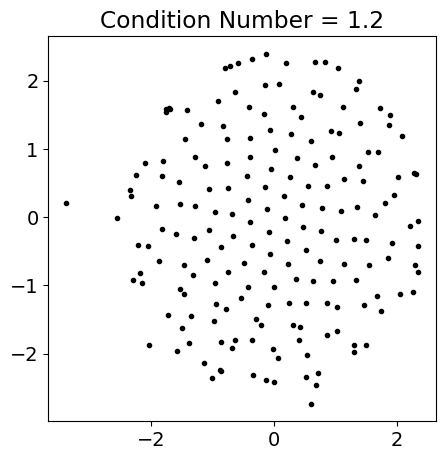

Displacements saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\optimized_displacements_67.npy


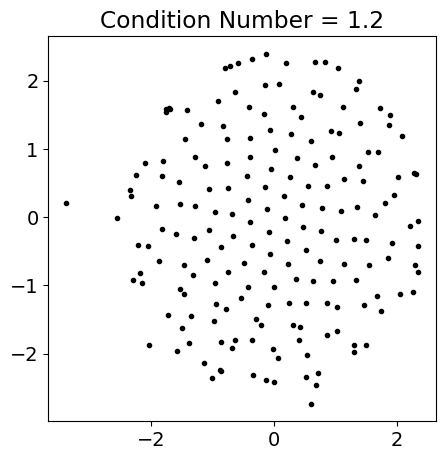

In [598]:
from fitting_folder.wigner import OptimalDisplacementGeneration
# Number of photons 
n_photon = 8
opt_alphas = OptimalDisplacementGeneration(FD = n_photon)
return_dict = opt_alphas.optimize(save_dir = expts_base_inst.expt_path )


In [ ]:
# Get frunc from |2>
def do_wigner_tomography_1mode(
    config_thisrun,
    expt_path,
    config_path,
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    gate_based=True,
    pulse_correction=False,
    relax_delay=2500,
    post_select_pre_pulse=False,
    opt_pulse=None,
    IQ_table=None,
):
    """
    Run the Wigner Tomography 1 Mode Experiment with configurable parameters.
    """
    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'pulse_correction': pulse_correction,
        'post_select_pre_pulse': post_select_pre_pulse,
        'opt_pulse': opt_pulse, 
        'IQ_table': IQ_table,
    }




    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomography1ModeExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomography1ModeExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.expt.gate_based = gate_based  # Set gate_based to False for Wigner tomography
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    # wigner_exp.cfg.device.readout.phase = 90.0  # Set readout phase to 0.0

    wigner_exp.go(analyze=True, display=False, progress=True, save=False)
    return wigner_exp

print(expts_base_inst)
# print(wigner_exp)


def do_wigner_tomography_1mode_optimal(
    config_thisrun,
    expt_path,
    config_path,
    pulse_to_test,
    nb_plot = 3, 
    displace_length=0.05,
    displacement_path=None,
    prepulse=False,
    pre_sweep_pulse=None,
    pre_gate_sweep_pulse=None,
    reps = 1000,
    qubits=[0],
    gate_based=True,
    pulse_correction=False,
    relax_delay=2500,
    post_select_pre_pulse=False,
    opt_pulse=None,
    IQ_table=None,
):
    

    expt_cfg = {
        'displace_length': displace_length,
        'displacement_path': displacement_path,
        'reps': reps,
        'rounds': 1,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse if pre_sweep_pulse is not None else [],
        'pre_gate_sweep_pulse': pre_gate_sweep_pulse if pre_gate_sweep_pulse is not None else [],
        'qubits': qubits,
        'pulse_correction': pulse_correction,
        'post_select_pre_pulse': post_select_pre_pulse,
        'opt_pulse': opt_pulse, 
        'IQ_table': IQ_table,
        'pulse_to_test': pulse_to_test,  # Add pulse_to_test to the configuration   
        'nb_plot': nb_plot,  # Number of plots to generate
    }

    wigner_exp = expts_base_inst.meas.qubit_cavity.single_mode_wigner_tomography.WignerTomographyOptimalPulseExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='WignerTomographyOptimalPulseExperiment', config_file=config_path
    )
    wigner_exp.cfg = AttrDict(deepcopy(config_thisrun))
    wigner_exp.cfg.expt = expt_cfg
    wigner_exp.cfg.expt.gate_based = gate_based
    wigner_exp.cfg.device.readout.relax_delay = [relax_delay]
    # wigner_exp.cfg.device.readout.phase = 90.0  # Set readout phase to 0.0

    wigner_exp.go(analyze=True, display=False, progress=True, save=True)
    return wigner_exp
        

## Wigner Tomography

### Sidebands

In [618]:
photon_list_pre = [2]
prep_man_pi = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list_pre, broadband=True)
# prep_man_pi.append(['storage', 'M1-S3', 'pi', 0])  # Add a pi pulse on storage after the prepulse
# photon_list = [0, 2]
# prep_man_bis = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list, broadband=True)
# for _pulse in prep_man_bis:
#     prep_man_pi.append(_pulse)
# print(f'Prepulse: {prep_man_pi}')
pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()

### Optimal control 

In [607]:
prepulse = [
            ['optimal_control', 'fock', '2', [0, 0]], 
            ]
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
pulse = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()

Gain for qubit: 793, Gain for cavity: 8041


In [619]:
wigner = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 500,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=True,
    pre_sweep_pulse=pulse,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500, 
    post_select_pre_pulse=False,
)

  0%|          | 0/189 [00:00<?, ?it/s]

(500, 189)
(500, 189)


In [620]:
wigner.analyze()

(500, 189)
(500, 189)


{'alpha': array([ 0.00000000e+00+0.j        ,  1.75481617e-01-0.01681573j,
        -1.70394855e+00+1.60315534j, -1.31041130e-01-2.38454825j,
         8.62789391e-01-1.72718752j, -4.87780538e-02+0.71376149j,
        -1.31596004e+00-0.84084602j,  1.01778174e+00-1.31386207j,
        -1.44281221e+00+1.14186926j, -7.55940507e-01-0.79808572j,
        -3.86532548e-01+0.88917121j, -5.85461535e-01+2.25513673j,
         1.13845040e+00-0.68311579j, -1.59097480e-01+1.51000731j,
         1.86508796e+00+1.35890936j, -6.83898295e-01-1.92206917j,
        -9.75467514e-01-1.52108824j,  7.58799161e-02+1.95226278j,
        -4.91730375e-01-0.6761172j ,  1.80172141e+00+0.2144875j ,
        -2.32034666e+00+0.30819298j, -3.66953218e-01-0.4049636j ,
        -2.14738289e+00-0.96467644j, -1.47253350e+00-1.13349093j,
         2.24934803e+00-1.10422113j,  2.25534625e-01-0.68527698j,
        -4.38020422e-01+0.60143741j,  1.94055539e+00+0.33193341j,
         2.08213408e+00+1.19031313j, -1.06560285e+00+0.41481527j,
 

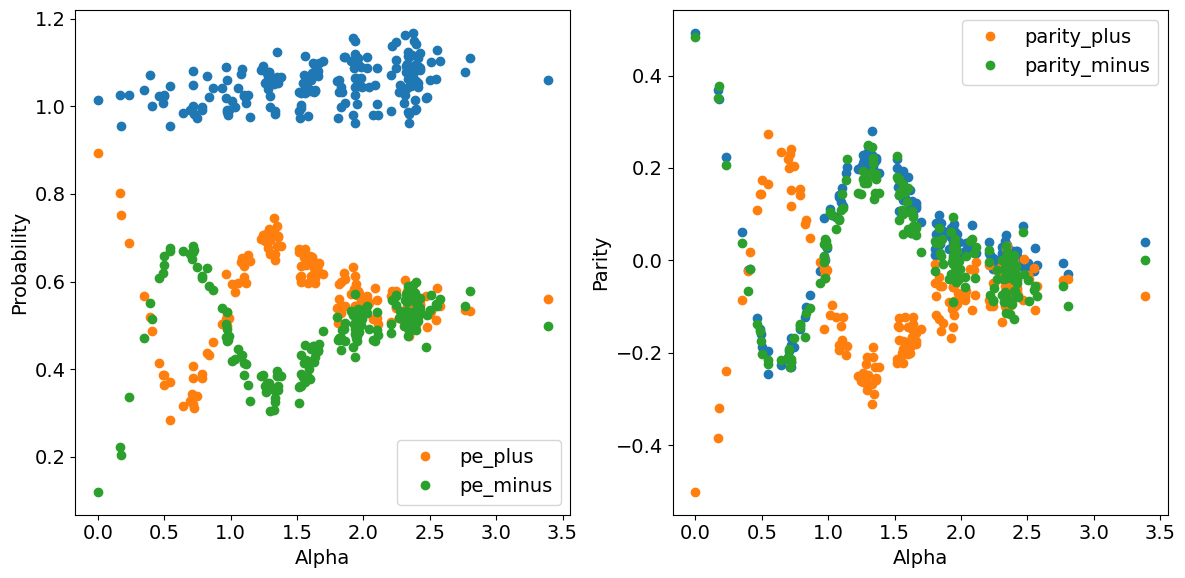

In [621]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

pe_plus = wigner.data['pe_plus']
pe_minus = wigner.data['pe_minus']
pe = pe_plus + pe_minus
ax[0].plot(np.abs(wigner.data['alpha']), pe, 'o')
ax[0].plot(np.abs(wigner.data['alpha']), pe_plus, 'o', label='pe_plus')
ax[0].plot(np.abs(wigner.data['alpha']), pe_minus, 'o', label='pe_minus')

parity_plus = wigner.data['parity_plus']
parity_minus = wigner.data['parity_minus']
parity = wigner.data['parity']
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity, 'o')
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_plus, 'o', label='parity_plus')
ax[1].plot(np.abs(wigner.data['alpha']), 2 / np.pi *parity_minus, 'o', label='parity_minus')

ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Probability')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Parity')
ax[0].legend()
ax[1].legend()
plt.tight_layout()

In [622]:
# get GKP states
def get_hex_GKP(Delta,d,N):
    psi_list = [0*qt.basis(N,0) for _ in range(d)]
    e1 = np.sqrt(2*np.pi/d/np.sqrt(3))*(np.sqrt(3)/2-0.5j)
    e2 = np.sqrt(2*np.pi/d/np.sqrt(3))*1j
    for n1 in range(-30,31):
        for n2 in range(-30,31):
            for mu in range(d):
                a1 = e1*(d*n1+mu)
                a2 = e2*n2
                psi_list[mu] += np.exp((a1*np.conj(a2)-np.conj(a1)*a2)/2)*qt.coherent(N,a1+a2,method='analytic')

    psis = [((-Delta**2*qt.num(N)).expm()*psi).unit() for psi in psi_list]
    return psis[0]

supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.8918')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-27_20-35-04_.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-27.md


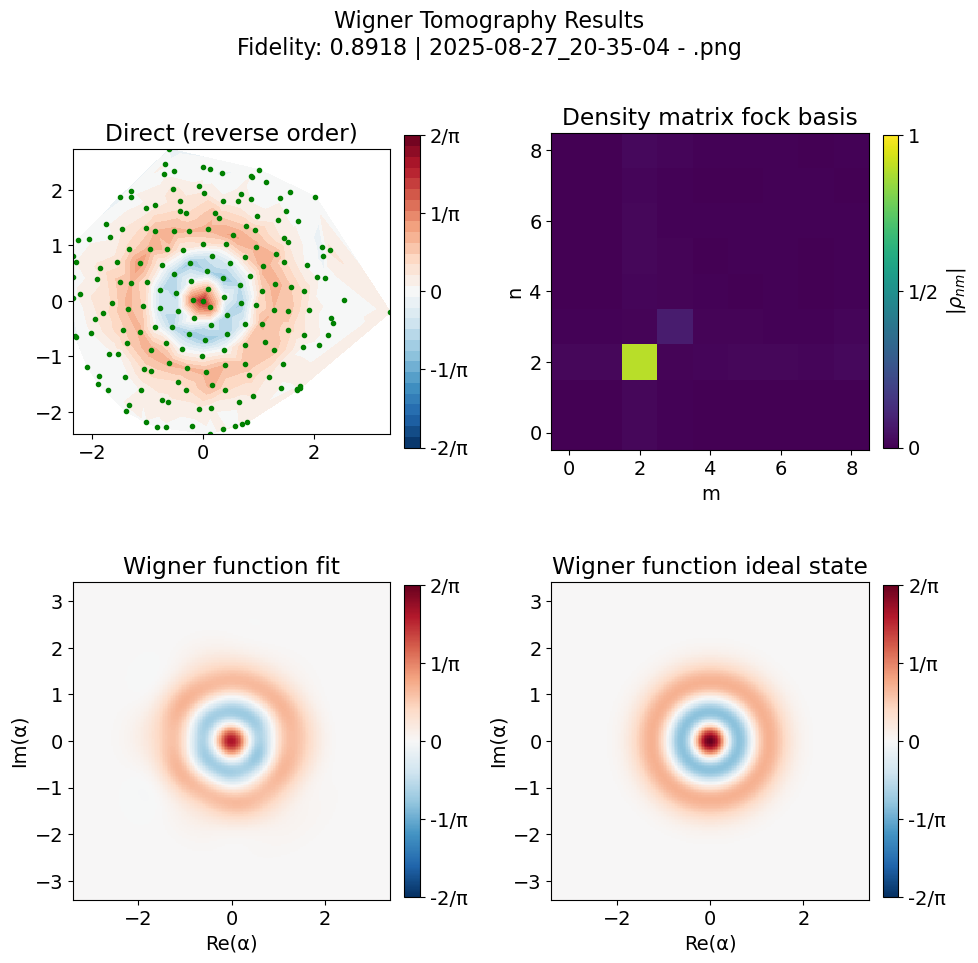

In [623]:
from fitting_folder.wigner import WignerAnalysis
wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=9, alphas = wigner.data['alpha'])
import qutip as qt
state_list = qt.zero_ket(wigner_analysis.m)  # Initialize the state list with the zero state |0>
for i in photon_list_pre:

    coeff = i/np.abs(i) if np.abs(i)>0 else 1
    state_list += coeff*qt.fock(wigner_analysis.m, int(np.abs(i)))
initial_state = state_list.unit()  # Normalize the state
# initial_state = get_hex_GKP(0.408,2,wigner_analysis.m)
initial_state = (1j*qt.fock(wigner_analysis.m, 2)).unit()  # Fock state |2>

# Dp = qt.displace(wigner_analysis.m, 1.2)  # Displacement operator with displacement parameter 1
# Dm = qt.displace(wigner_analysis.m, -1.2)  # Displacement operator with displacement parameter 1
# initial_state = ((Dp+Dm)*qt.fock(wigner_analysis.m, 0)).unit()  # Displaced vacuum state |0> with displacement parameter 1



results = wigner_analysis.wigner_analysis_results(wigner.data['parity'], initial_state=initial_state, rotate=False)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '')

## Debug optimal control
This is taking one optimal control pulse and measure both the qubit and cavity tomography for several time slices. 

In [ ]:
# prepulse = [['optimal_control', 'test', '2', [0, 0]]]
# gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(prepulse[0])
# print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][0]= gain_qb
# expts_base_inst.config_thisrun.device.optimal_control[prepulse[0][1]][prepulse[0][2]]['gain'][1]= gain_cav
# prepulse = mm_base_calib.get_prepulse_creator(prepulse, cfg=expts_base_inst.config_thisrun).pulse.tolist()


pulse_to_test = [['optimal_control', 'fock', '1', [0, 0]]]
pulse_conf = expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]

# set gain 
gain_qb, gain_cav = mm_base_calib.get_gain_optimal_pulse(pulse_to_test[0])
print(f'Gain for qubit: {gain_qb}, Gain for cavity: {gain_cav}')
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][0]= 20000
# expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][0]= gain_qb
expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][1]= 20000
# expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['gain'][1]= gain_cav



# import the I, Q, times 
filename = expts_base_inst.config_thisrun.device.optimal_control[pulse_to_test[0][1]][pulse_to_test[0][2]]['filename']
data = np.load(filename, allow_pickle=True)
times = data['times'] * 1e-3
Ic = data['I_c']
Qc = -data['Q_c']
Iq = data['I_q']
Qq = -data['Q_q']
qb_scale = max((np.max(np.abs(Iq)), np.max(np.abs(Qq))))
cav_scale = max((np.max(np.abs(Ic)), np.max(np.abs(Qc))))

if qb_scale !=0: 
    Iq /= qb_scale
    Qq /= qb_scale

if cav_scale !=0: 
    Ic /= cav_scale
    Qc /= cav_scale

t_length = len(times)
nb_plot = 1
t_step = (times[-1] - times[0]) / nb_plot
# t_to_plot = np.arange(0, times[-1]+t_step, t_step)
t_to_plot = np.array([times[-1]])
# t_to_plot[0] +=0.05

data_tot = []
data.close()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(times, Ic, label='Cavity I')
ax.scatter(times, Qc, label='Cavity Q')
ax.scatter(times, Iq, label='Qubit I')
ax.scatter(times, Qq, label='Qubit Q')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Normalized Signal')
ax.legend()
# add vertical lines at t_to_plot
for t in t_to_plot:
    ax.axvline(t, color='k', linestyle='--', alpha=0.5)

In [ ]:
for i in range(len(t_to_plot)):

    idx_t = np.argmin(np.abs(times - t_to_plot[i]))
    IQ_table = {
        'I_c': Ic[:idx_t],
        'Q_c': Qc[:idx_t],
        'I_q': Iq[:idx_t],
        'Q_q': Qq[:idx_t],
        'times': times[:idx_t]
    }

    wigner = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 250000,
    displacement_path=return_dict['path'], #optimal displacement path
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based = False,
    pulse_correction=True,
    relax_delay=2500, 
    post_select_pre_pulse=False,
    IQ_table=IQ_table,
    opt_pulse=pulse_to_test
    )

    wigner.analyze()
    wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg,
                                      mode_state_num=10, alphas = wigner.data['alpha'])
    results = wigner_analysis.wigner_analysis_results(wigner.data['parity'],
                                                       initial_state=qt.fock(wigner_analysis.m, 0), rotate=False)
    fig = wigner_analysis.plot_wigner_reconstruction_results(results, 
                                                             initial_state=qt.fock(wigner_analysis.m, 0), state_label = '')


    rho = results['rho']
    wigner.data['rho'] = rho
    data_tot.append(wigner.data)

In [ ]:
plot_wigner = True
n_distr = np.zeros((len(data_tot), wigner_analysis.m))
p_vec =np.zeros((len(data_tot), 2))
# for each time slice use the rho to compute the photon number distribution
for i in range(len(data_tot)):
    _n_distr = np.diag(data_tot[i]['rho'])
    n_distr[i, :] = _n_distr
    p_vec[i, 1] = data_tot[i]['pe_postpulse']
    p_vec[i, 0] = 1 - p_vec[i, 1]



# open simulation data
if 'pulse' in filename:
    filename_th = filename.replace('pulse', 'pop_sim\populations')
else:
    filename_th = filename.replace('optimal_control\\', 'optimal_control\\pop_sim\\populations_')
data_th = np.load(filename_th, allow_pickle=True)
n_distr_th = data_th['cavity']
p_vec_th = data_th['qubit'][1, :]
times_th = data_th['times'] * 1e-3
rho_cav_t = data_th['rho_cav_t']

F_vec = np.zeros(len(data_tot))

for i in range(len(data_tot)):
    rho_exp = qt.Qobj(data_tot[i]['rho'])
    cutoff_exp = rho_exp.shape[0]
    cutoff_th = rho_cav_t.shape[1]
    cutoff = min(cutoff_exp, cutoff_th)
    idx_t = np.argmin(np.abs(times_th - t_to_plot[i]))
    rho_th = qt.Qobj(rho_cav_t[:cutoff, :cutoff, idx_t])
    rho_exp = qt.Qobj(rho_exp[:cutoff, :cutoff])
    F_vec[i] = qt.fidelity(rho_exp, rho_th)

    if plot_wigner:
        vmin = -2 / np.pi
        vmax = 2 / np.pi
        alpha_list = data_tot[i]['alpha']
        alpha_max = np.max(np.abs(alpha_list))*1.5
        x_vec = np.linspace(-alpha_max, alpha_max, 150)
        W_exp= qt.wigner(rho_exp, x_vec, x_vec)
        W_th = qt.wigner(rho_th, x_vec, x_vec)
        fig, ax = plt.subplots(1, 2, figsize=(6, 3))
        # ax[0].set_aspect('equal')
        ax[0].pcolormesh(x_vec, x_vec, W_exp, vmin=vmin, vmax=vmax, cmap='RdBu_r')
        ax[0].set_xlabel('Re(α)')
        ax[0].set_ylabel('Im(α)')
        ax[0].set_title(f'Exp at t={t_to_plot[i]:.2f} us')

        # ax[1].set_aspect('equal')
        ax[1].pcolormesh(x_vec, x_vec, W_th, vmin=vmin, vmax=vmax, cmap='RdBu_r')
        ax[1].set_xlabel('Re(α)')
        ax[1].set_ylabel('Im(α)')
        ax[1].set_title(f'Th')
        fig.tight_layout()

        # save the figure the the filemane for pop
        fig.savefig(filename_th.replace('.npz', f'_wigner_{i}.png'), dpi=300)


    


# plot a heatmap of the photon number distribution and qubit

fig1, ax1 = plt.subplots(2, 1, figsize=(6, 6))
cax = ax1[0].imshow(n_distr.T, 
                   aspect='auto', origin='lower', cmap='viridis', 
                   extent=[t_to_plot[0], t_to_plot[-1], 0, n_distr.shape[1]-1])
ax1[0].set_xlabel('Time (us)')
ax1[0].set_ylabel('Photon Number')
ax1[0].set_title('Photon Number Distribution exp/theory')

cax2 = ax1[1].imshow(n_distr_th[:n_distr.T.shape[0], ],
                     aspect='auto', origin='lower', cmap='viridis',
                     extent=[times_th[0], times_th[-1], 0,n_distr.T.shape[0]-1])
ax1[1].set_xlabel('Time (us)')
ax1[1].set_ylabel('Photon Number')
# fig.colorbar(cax, ax=ax[0])
fig1.tight_layout()
# save the figure
fig1.savefig(filename_th.replace('.npz', '_photon_distribution.png'), dpi=300)

fig2, ax2 = plt.subplots(2, 1, figsize=(6, 6))

ax2[0].plot(t_to_plot, p_vec[:, 0], 'o-', label='e',
           color='tab:blue', markersize=4, linewidth=1.2)
ax2[0].plot(t_to_plot, p_vec[:, 1], 'o-', label='g',
           color='tab:red', markersize=4, linewidth=1.2)
ax2[0].plot(times_th, p_vec_th, linestyle='--', color = 'tab:blue')
ax2[0].plot(times_th, 1-p_vec_th, linestyle='--', color='tab:red')
ax2[0].set_xlabel('Time (us)')
ax2[0].set_ylabel('Probability')
ax2[0].set_title('Qubit Probabilities')
ax2[0].legend()

ax2[1].plot(t_to_plot, F_vec, 'o-', color='tab:green', markersize=4, linewidth=1.2)
ax2[1].set_xlabel('Time (us)')
ax2[1].set_ylabel('Fidelity')
ax2[1].set_title('Cavity state')
fig2.tight_layout()
# save the figure
fig2.savefig(filename_th.replace('.npz', '_qubit_fidelity.png'), dpi=300)


In [ ]:
# close all files npz and plt
plt.close('all')
data_th.close()

In [ ]:
# save the data
np.savez(filename_th.replace('.npz', '_data.npz'),
         n_distr=n_distr, p_vec=p_vec, F_vec=F_vec,
         n_distr_th=n_distr_th, p_vec_th=p_vec_th, times=times_th,
         t_to_plot=t_to_plot, data_tot=data_tot)

## Transduction experiment

### Parameters

In [633]:
cutoff = 8
eta_vec = np.linspace(0.1, 0.6, 15)
print(eta_vec)
theta_vec = np.arccos(np.sqrt(eta_vec))*2
ratio = theta_vec / np.pi
use_optimal_control = False

phase_corr = [0, 0, -127.27272727272728+10.90909090909091+5.4545454545454675
, -261.8181818181818+32.72727272727273+16.363636363636402]

# define pulses before wigner

prepulse_before = [[], [], [], []]
prepulse_after = [[], [], [], []]
# photon_list_pre = [1]
# prep_man_pi = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list_pre, broadband=True)
# prep_man_pi.append(['storage', 'M1-S1', 'pi', 0])  # Add a pi pulse on storage after the prepulse
# photon_list = [0, 2]
# prep_man_bis = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=photon_list, broadband=True)
# for _pulse in prep_man_bis:
#     prep_man_pi.append(_pulse)
# print(f'Prepulse: {prep_man_pi}')
# pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()

[0.1        0.13571429 0.17142857 0.20714286 0.24285714 0.27857143
 0.31428571 0.35       0.38571429 0.42142857 0.45714286 0.49285714
 0.52857143 0.56428571 0.6       ]


### Prepare fock 1

In [634]:
fock_list = [1]
prep_fock_1 = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=fock_list, broadband=True)
for _pulse in prep_fock_1:
    for j in range(len(prepulse_before)):
        prepulse_before[j].append(_pulse)
        prepulse_after[j].append(_pulse)

for j in range(len(prepulse_before)):
    prepulse_before[j].append(['storage', 'M1-S3', 'pi', 0])  # Add a pi pulse on storage after the prepulse
    prepulse_after[j].append(['storage', 'M1-S3', 'pi', 0])  # Add a pi pulse on storage after the prepulse

### Prepare the cardinal states

In [635]:
if not use_optimal_control:
    prep_2 = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=[2], broadband=True)
    prep_0_2 = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=[0, 2], broadband=True)
    prep_0_2j = mm_base_calib.prep_fock_state(man_no=1, photon_no_list=[0, 2j], broadband=True)
    prep_0_2[0][-1] = phase_corr[2]
    prep_0_2j[0][-1] = phase_corr[3]

    for _pulse in prep_2:
        prepulse_before[1].append(_pulse)
        prepulse_after[1].append(_pulse)
    for _pulse in prep_0_2:
        prepulse_before[2].append(_pulse)
        prepulse_after[2].append(_pulse)
    for _pulse in prep_0_2j:
        prepulse_before[3].append(_pulse)
        prepulse_after[3].append(_pulse)
else:
    prepulse_before[1].append(['optimal_control', 'fock', '2', [0, 0]])
    prepulse_after[1].append(['optimal_control', 'fock', '2', [0, 0]])
    prepulse_before[2].append(['optimal_control', 'fock', '0+2', [0, 0]])
    prepulse_after[2].append(['optimal_control', 'fock', '0+2', [0, 0]])
    prepulse_before[3].append(['optimal_control', 'fock', '0+2i', [0, 0]])
    prepulse_after[3].append(['optimal_control', 'fock', '0+2i', [0, 0]])



    

Preparing state 0 and 2 with coeff 1.0
Preparing state 0 and 2 with coeff 1j


### add the swap we want to test

In [636]:
for j in range(len(prepulse_before)):
    prepulse_after[j].append(['storage', 'M1-S3', 'pi', 0])  # Add a pi pulse on storage after the prepulse
    

### Measure the tomography before the swap test 

In [637]:
state_labels = ['0', '2', '0_2', '0_2i']
initial_start_qt = [0 * qt.fock(cutoff, 0) for _ in range(len(state_labels))]
initial_states = [[0], [2], [0, 2], [0, 2j]]
for idx, photon_list in enumerate(initial_states):
    print(f'Initial state: {photon_list}')
    for i in photon_list:
        n = int(np.abs(i))  # photon number
        state = qt.fock(cutoff, n)
        coeff = i/np.abs(i) if np.abs(i) > 0 else 1
        initial_start_qt[idx] += coeff * state
    

Initial state: [0]
Initial state: [2]
Initial state: [0, 2]
Initial state: [0, 2j]


In [638]:
mm_base_calib.get_prepulse_creator(prepulse_before[2], cfg=expts_base_inst.config_thisrun).pulse.tolist()

[[3579.7738728599984,
  3428.2636504748903,
  2011.6693654525284,
  695.7913204550518,
  3572.9959650749265,
  3428.2636504748903,
  3579.7738728599984,
  2011.6693654525284,
  3579.7738728599984,
  3427.984451944102,
  2011.1834449076475],
 [18719, 2751, 8000, 4883, 8790, 2751, 18719, 8000, 18719, 2749, 8000],
 [0,
  0,
  0.5408883810926033,
  1.0572292099884133,
  0,
  0,
  0,
  0.5408883810926033,
  0,
  0,
  0.38972624590019683],
 [0, 0, 0, 0, -110.9090909090909, 0, 0, 0, 0, 0, 0],
 [2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0],
 ['gauss',
  'gauss',
  'flat_top',
  'flat_top',
  'gauss',
  'gauss',
  'gauss',
  'flat_top',
  'gauss',
  'gauss',
  'flat_top'],
 [0.007, 0.035, 0.005, 0.005, 0.007, 0.035, 0.007, 0.005, 0.007, 0.035, 0.005]]

In [639]:
# for j in range(len(prepulse_before)):
wigner_data_before = []
for j in range(len(prepulse_before)):
# for j in [0]:
    prepulse = mm_base_calib.get_prepulse_creator(prepulse_before[j], cfg=expts_base_inst.config_thisrun).pulse.tolist()
    print(f'Prepulse {j}: {prepulse_before[j]}')
    wigner = do_wigner_tomography_1mode(
        config_thisrun=expts_base_inst.config_thisrun,
        expt_path=expts_base_inst.expt_path,
        config_path=expts_base_inst.config_file,
        displace_length=0.05,
        reps = 250,
        displacement_path=return_dict['path'], #optimal displacement path
        prepulse=True,
        pre_sweep_pulse=prepulse,
        gate_based = False,
        pulse_correction=True,
        relax_delay=7000, 
        post_select_pre_pulse=False,
    )
    wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg,
                                      mode_state_num=10, alphas = wigner.data['alpha'])
    results = wigner_analysis.wigner_analysis_results(wigner.data['parity'],
                                                       initial_state=initial_start_qt[j], rotate=True)
    # add the the keys of results to wigner.data
    for key in results:
        if key != 'wigner_analysis':
            wigner.data[key] = results[key].full() if isinstance(results[key], qt.Qobj) else results[key]
    
    wigner.save_data()
    fig = wigner_analysis.plot_wigner_reconstruction_results(results, 
                                                             initial_state=initial_start_qt[j],
                                                               state_label = state_labels[j] + ' initial')
    wigner_data_before.append(wigner.data)
    

Prepulse 0: [['multiphoton', 'g0-e0', 'pi', 0], ['multiphoton', 'e0-f0', 'pi', 0], ['multiphoton', 'f0-g1', 'pi', 0], ['storage', 'M1-S3', 'pi', 0]]


  0%|          | 0/189 [00:00<?, ?it/s]

KeyboardInterrupt: 

### For the 4 cardinal states measure the tomography versus eta 

  0%|          | 0/2 [00:00<?, ?it/s]

Prepulse 0: [[3579.7738728599984, 3428.2636504748903, 2011.6693654525284, 695.7913204550518, 695.7913204550518], [18719, 2751, 8000, 4883, 4883], [0, 0, 0.5408883810926033, 1.0572292099884133, 1.0572292099884133], [0, 0, 0, 0, 0], [2, 2, 0, 1, 1], ['gauss', 'gauss', 'flat_top', 'flat_top', 'flat_top'], [0.007, 0.035, 0.005, 0.005, 0.005]]
0.8406740279858058


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00930_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.1410')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_07-14-36_0_final_r=0.80.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.8032989950852558


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00931_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.1729')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_07-26-35_0_final_r=0.76.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.769911508386209


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00932_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.1940')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_07-38-34_0_final_r=0.73.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.7391997864322827


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00933_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2291')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_07-50-32_0_final_r=0.70.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.710397667660999


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00934_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2901')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_08-02-29_0_final_r=0.67.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6830071941586342


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00935_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3135')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_08-14-29_0_final_r=0.65.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6566788231142144


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00936_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3381')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_08-26-27_0_final_r=0.62.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6311517603207842


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00937_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3712')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_08-38-28_0_final_r=0.60.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6062209871484449


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00938_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.4147')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_08-50-26_0_final_r=0.57.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5817174435419146


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00939_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.4728')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_09-02-25_0_final_r=0.55.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5574951722340117


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00940_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.4856')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_09-14-23_0_final_r=0.53.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5334222900946757


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00941_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.5328')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_09-26-20_0_final_r=0.50.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.509374037976291


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00942_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.5496')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_09-38-17_0_final_r=0.48.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.48522680842499905


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00943_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.6068')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_09-50-15_0_final_r=0.46.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.46085232675013876


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00944_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.6215')


 50%|█████     | 1/2 [2:59:36<2:59:36, 10776.89s/it]

Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_10-02-12_0_final_r=0.44.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
Prepulse 1: [[3579.7738728599984, 3428.2636504748903, 2011.6693654525284, 695.7913204550518, 3579.7738728599984, 3428.2636504748903, 2011.6693654525284, 3571.869462789635, 3427.984451944102, 2011.1834449076475, 695.7913204550518], [18719, 2751, 8000, 4883, 18719, 2751, 8000, 3440, 2749, 8000, 4883], [0, 0, 0.5408883810926033, 1.0572292099884133, 0, 0, 0.5408883810926033, 0, 0, 0.38972624590019683, 1.0572292099884133], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1], ['gauss', 'gauss', 'flat_top', 'flat_top', 'gauss', 'gauss', 'flat_top', 'gauss', 'gauss', 'flat_top', 'flat_top'], [0.007, 0.035, 0.005, 0.005, 0.007, 0.035, 0.005, 0.035, 0.035, 0.005, 0.005]]
0.8406740279858058


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00945_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2900')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_10-14-20_2_final_r=0.80.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.8032989950852558


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00946_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3143')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_10-26-28_2_final_r=0.76.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.769911508386209


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00947_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3407')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_10-38-38_2_final_r=0.73.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.7391997864322827


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00948_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3291')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_10-50-45_2_final_r=0.70.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.710397667660999


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00949_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3342')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_11-02-55_2_final_r=0.67.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6830071941586342


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00950_WignerTomography1ModeExperiment.h5


C:\_Lib\python\multimode_expts\fitting_folder\wigner.py:353: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(2, 2, figsize=(10, 10))


supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.3168')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_11-15-03_2_final_r=0.65.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6566788231142144


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00951_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2881')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_11-27-11_2_final_r=0.62.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6311517603207842


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00952_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2409')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_11-39-20_2_final_r=0.60.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.6062209871484449


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00953_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.2051')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_11-51-29_2_final_r=0.57.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5817174435419146


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00954_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.1915')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_12-03-37_2_final_r=0.55.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5574951722340117


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00955_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.1488')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_12-15-47_2_final_r=0.53.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.5334222900946757


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00956_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.0730')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_12-27-56_2_final_r=0.50.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.509374037976291


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00957_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.0753')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_12-40-05_2_final_r=0.48.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.48522680842499905


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00958_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.0777')
Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_12-52-14_2_final_r=0.46.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md
0.46085232675013876


  0%|          | 0/189 [00:00<?, ?it/s]

(250, 189)
(250, 189)
Saving H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\00959_WignerTomography1ModeExperiment.h5
supertitle is  Text(0.5, 0.98, 'Wigner Tomography Results\nFidelity: 0.0306')


100%|██████████| 2/2 [6:01:48<00:00, 10854.02s/it]  

Plot saved to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs/plots\2025-08-28_13-04-23_2_final_r=0.44.png
Plot path appended to H:\Shared drives\SLab\Multimode\experiment\250505_craqm\data\plots_and_logs\2025-08-28.md


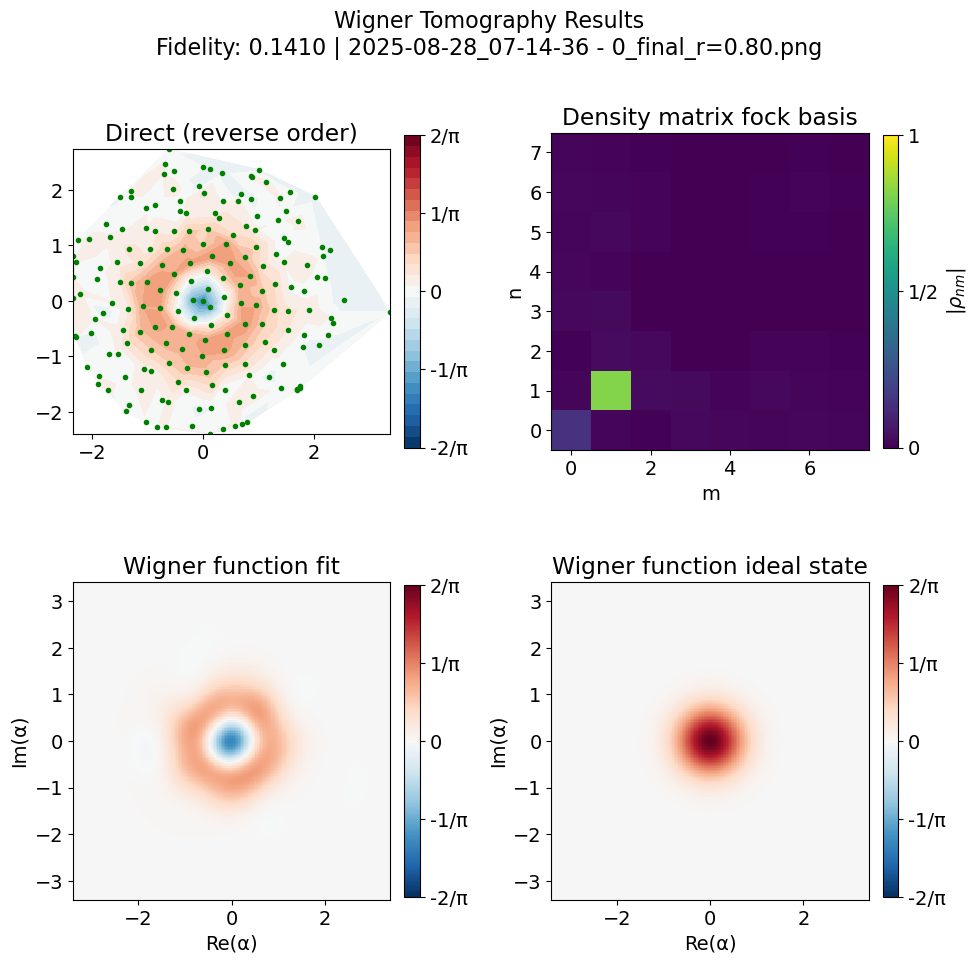

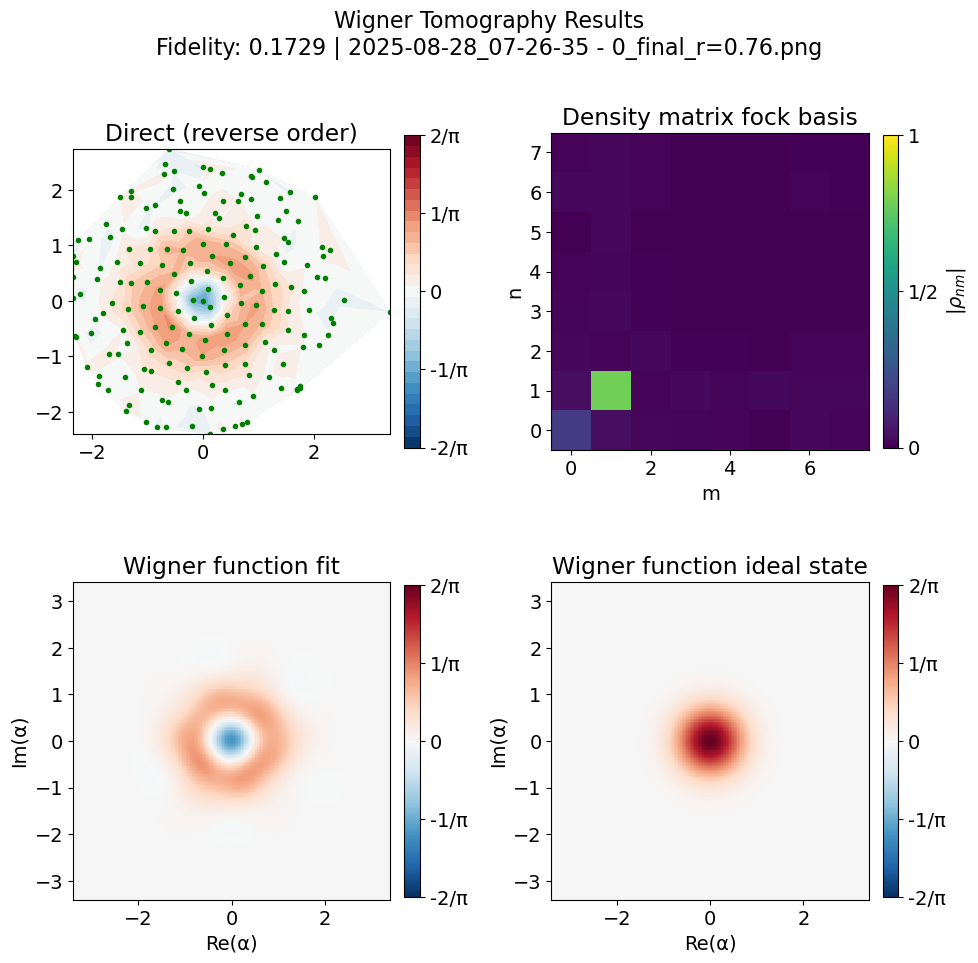

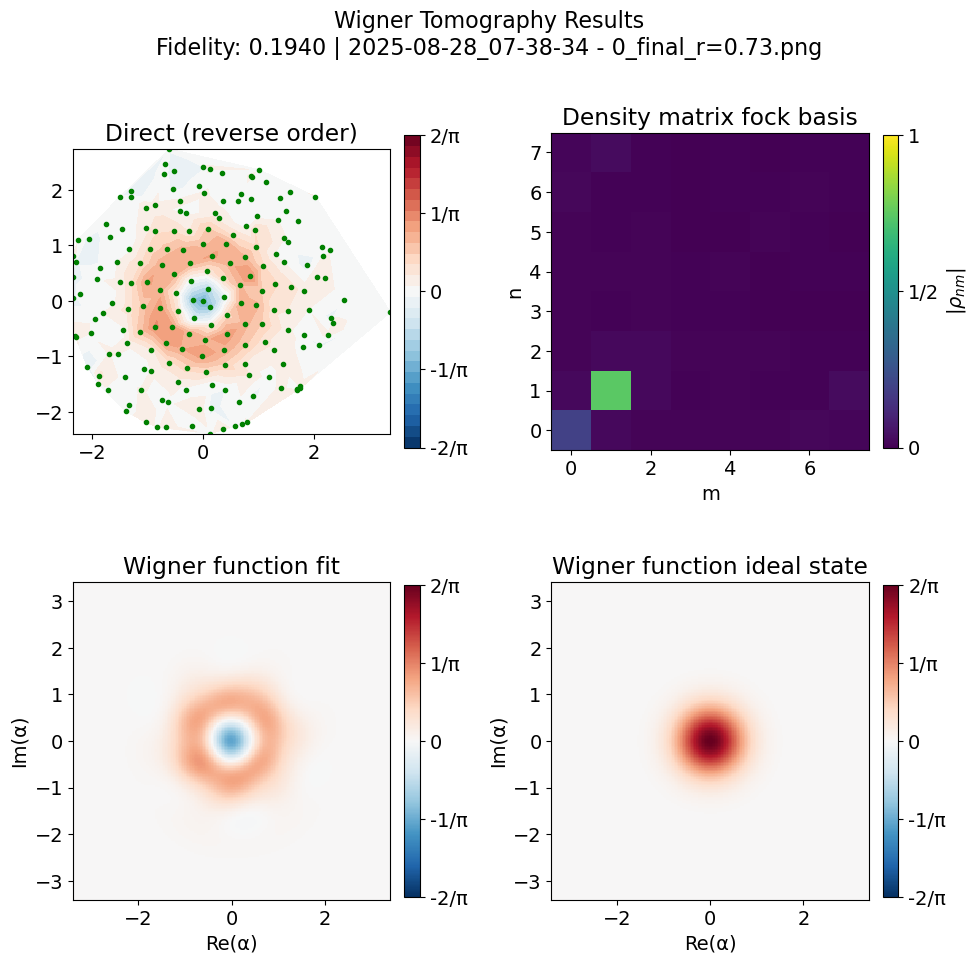

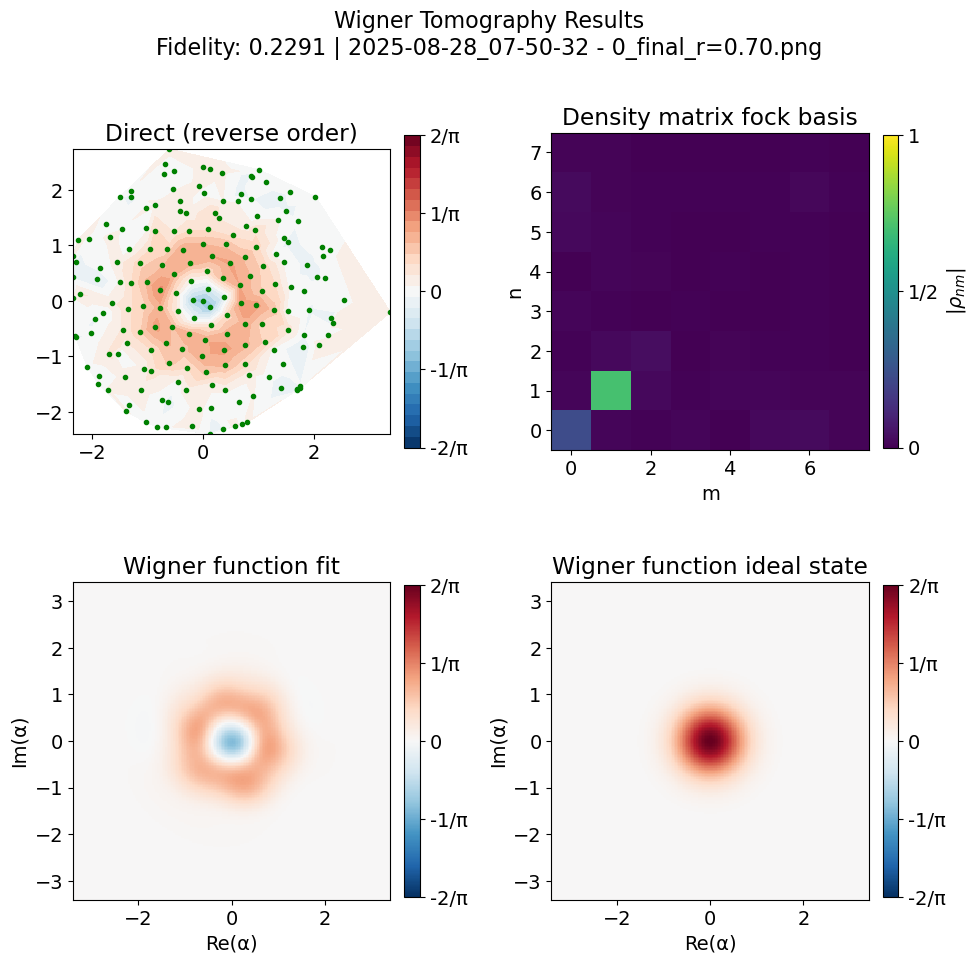

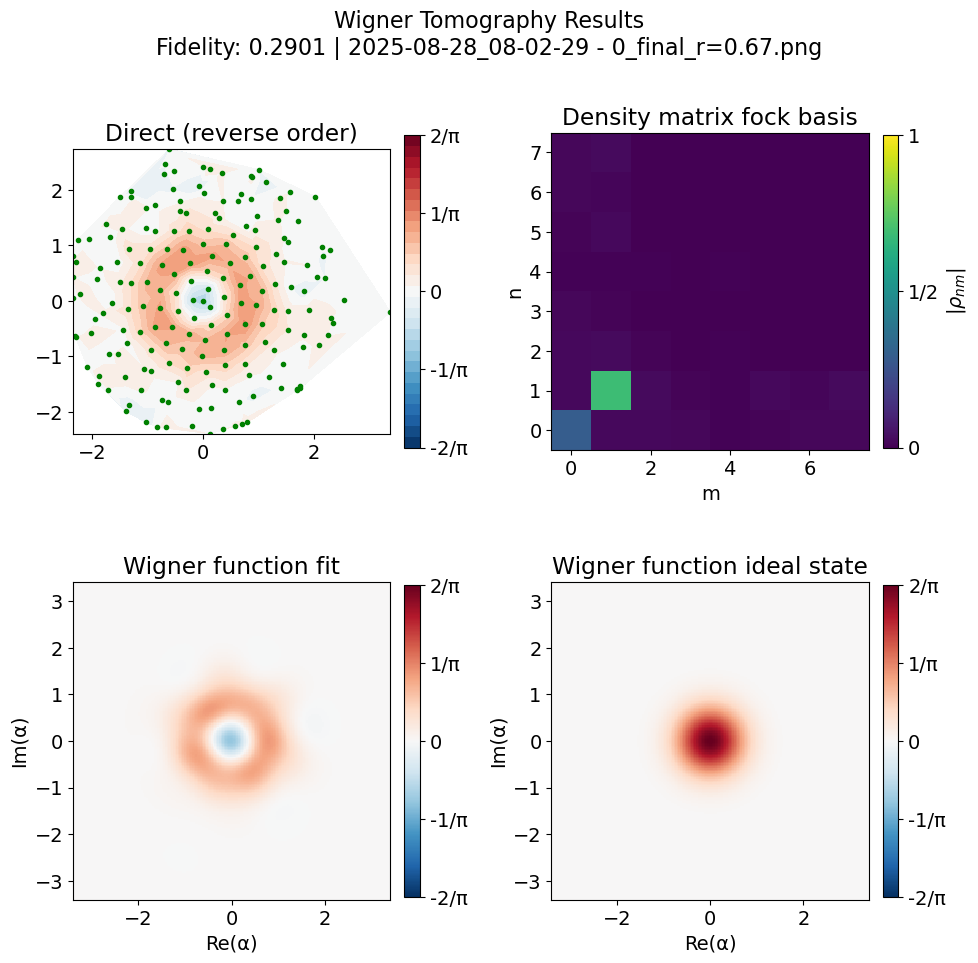

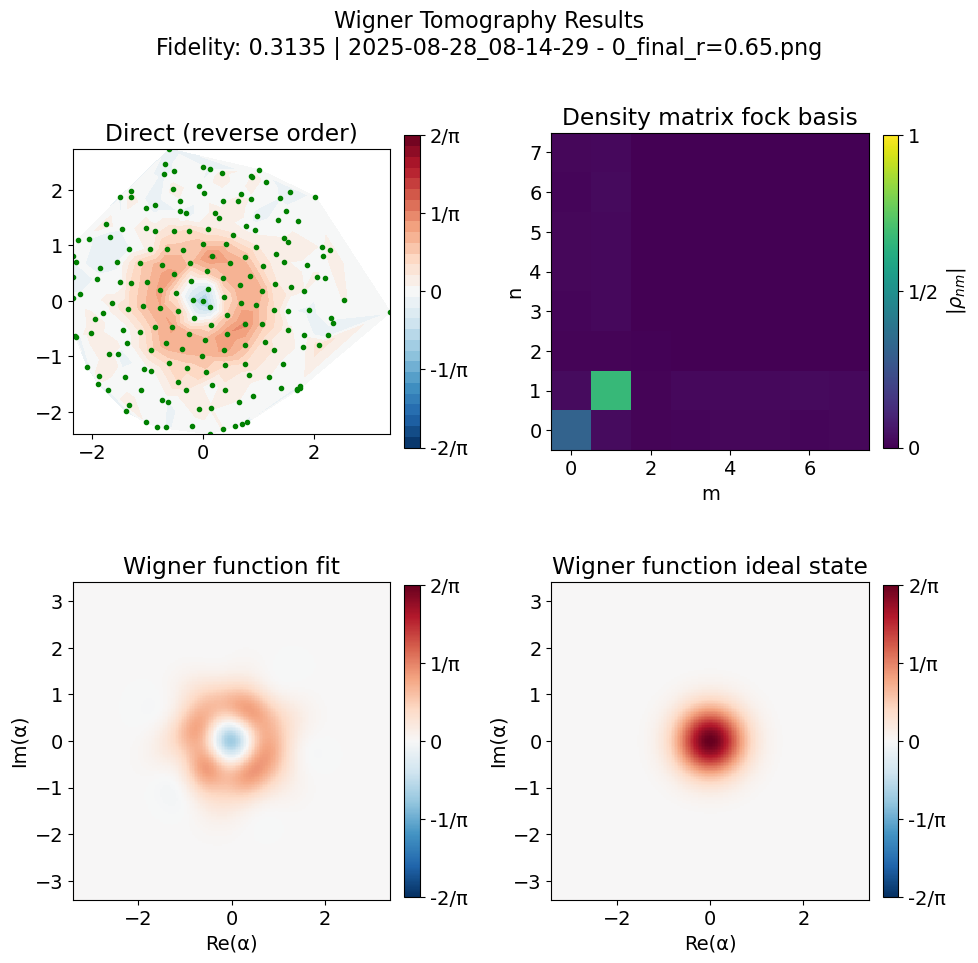

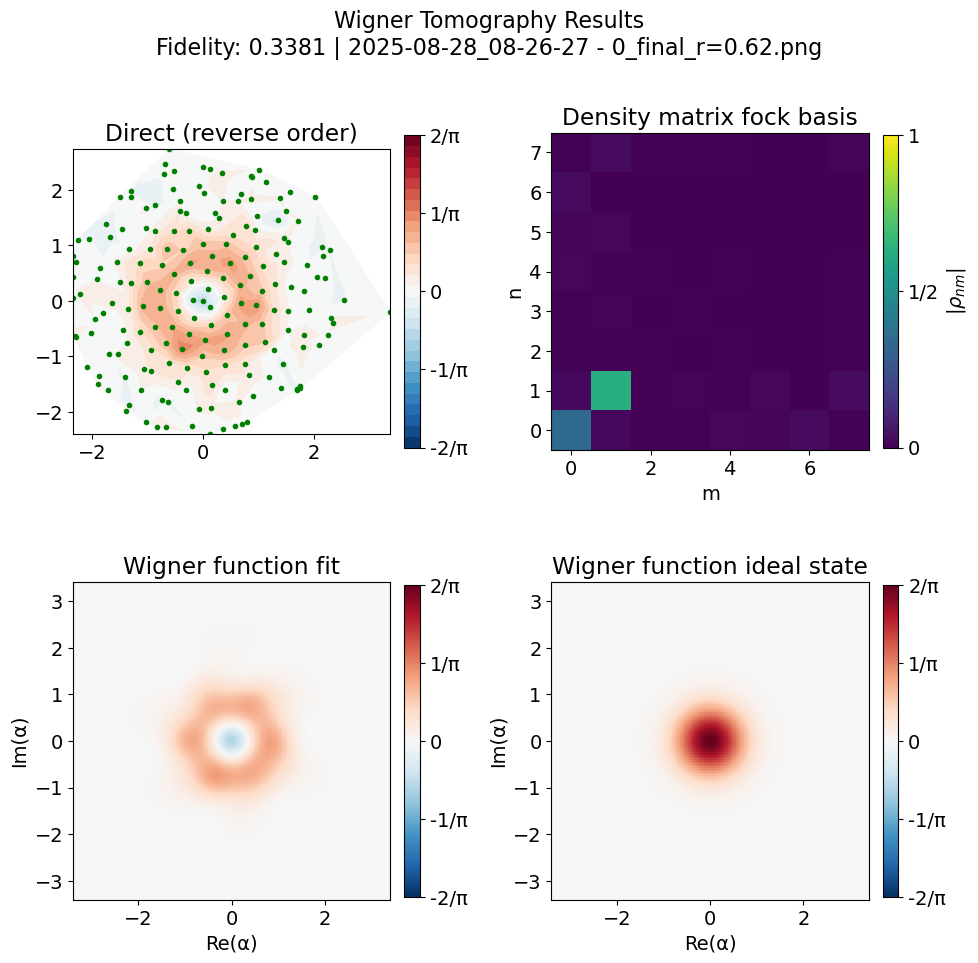

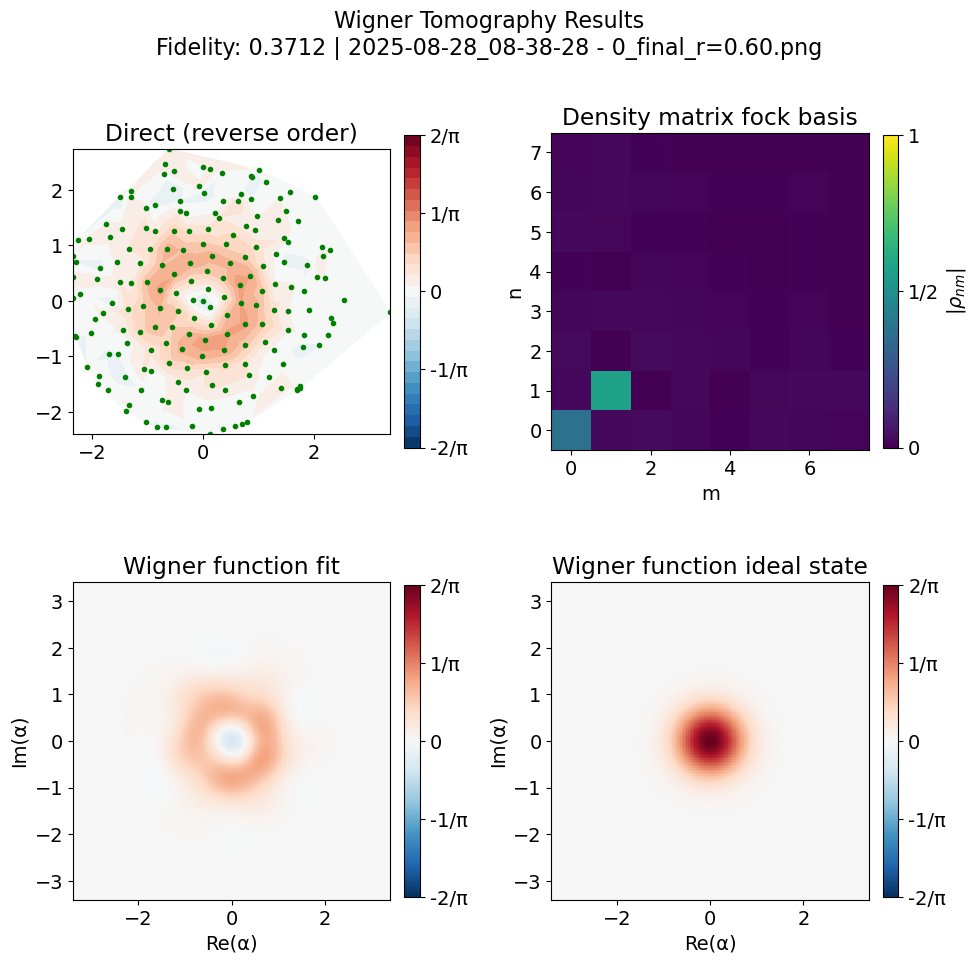

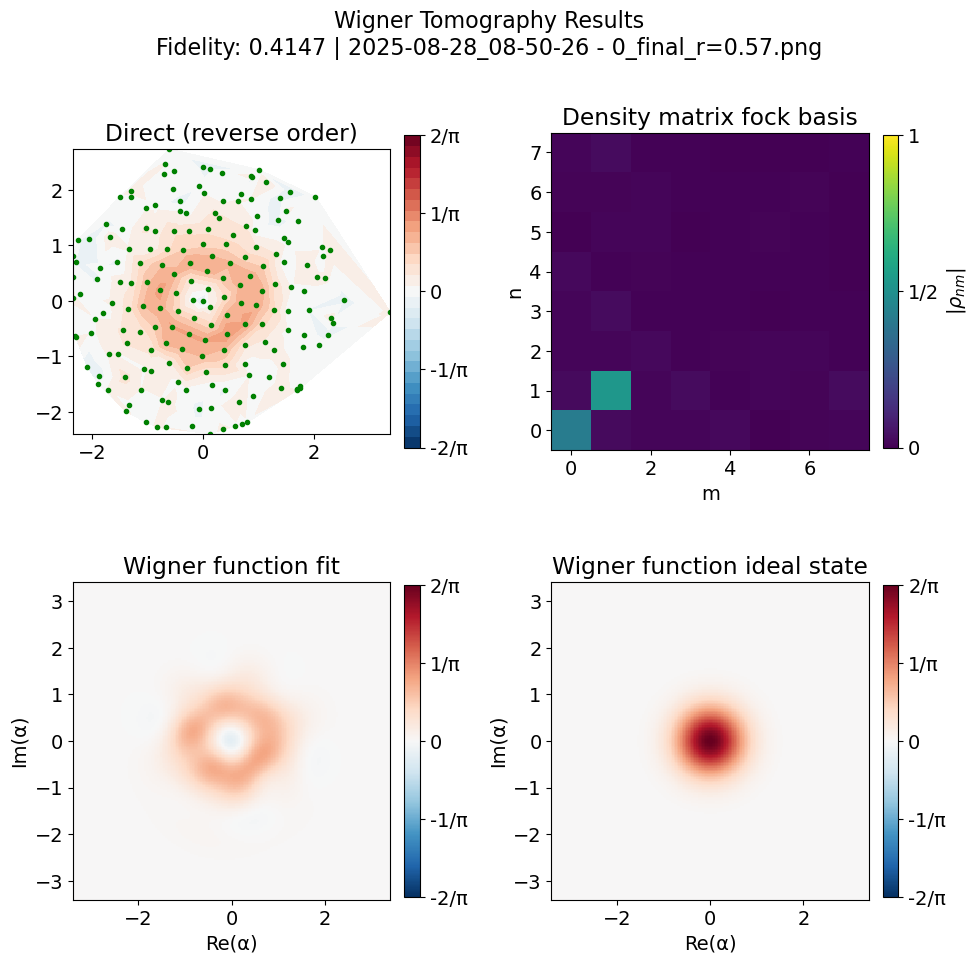

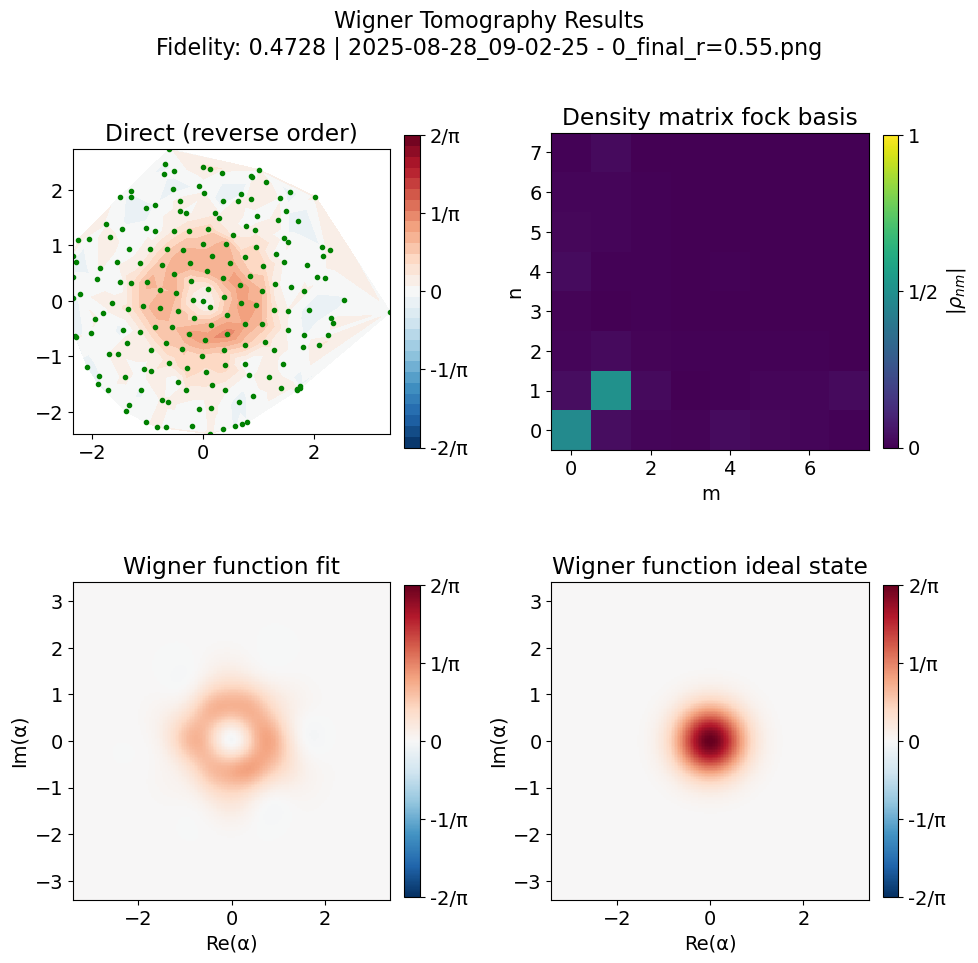

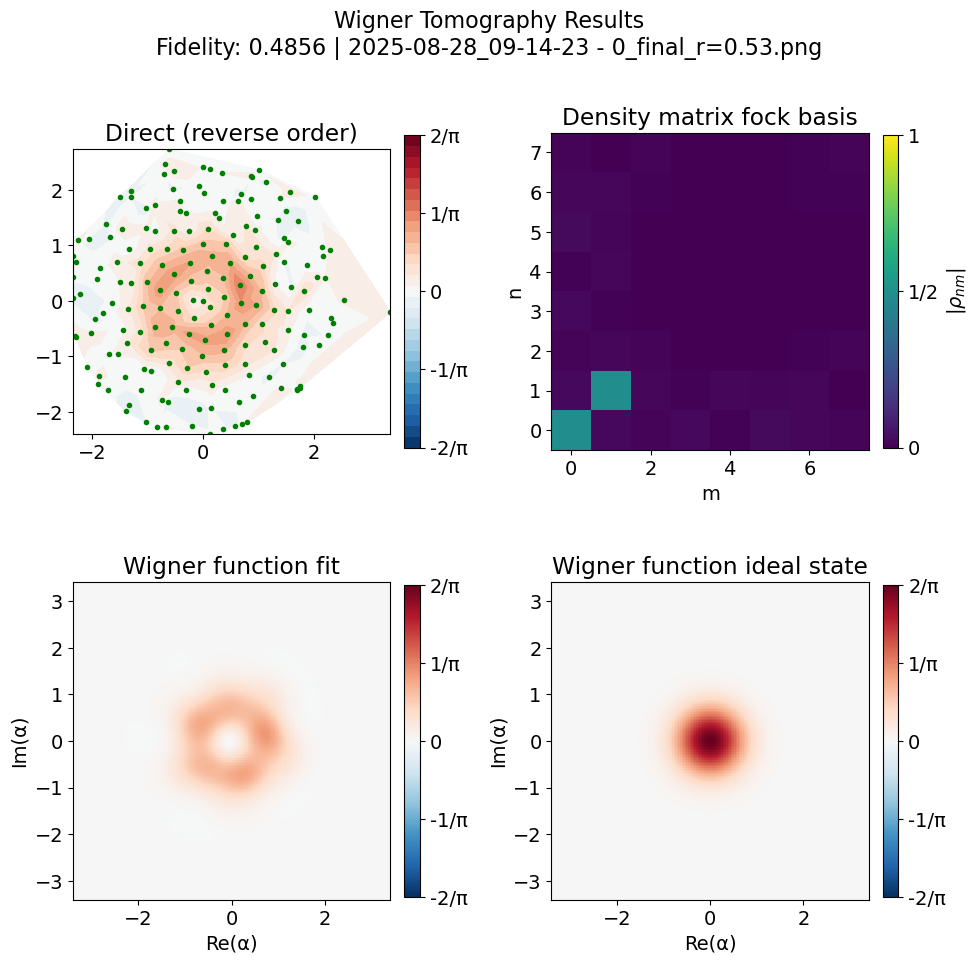

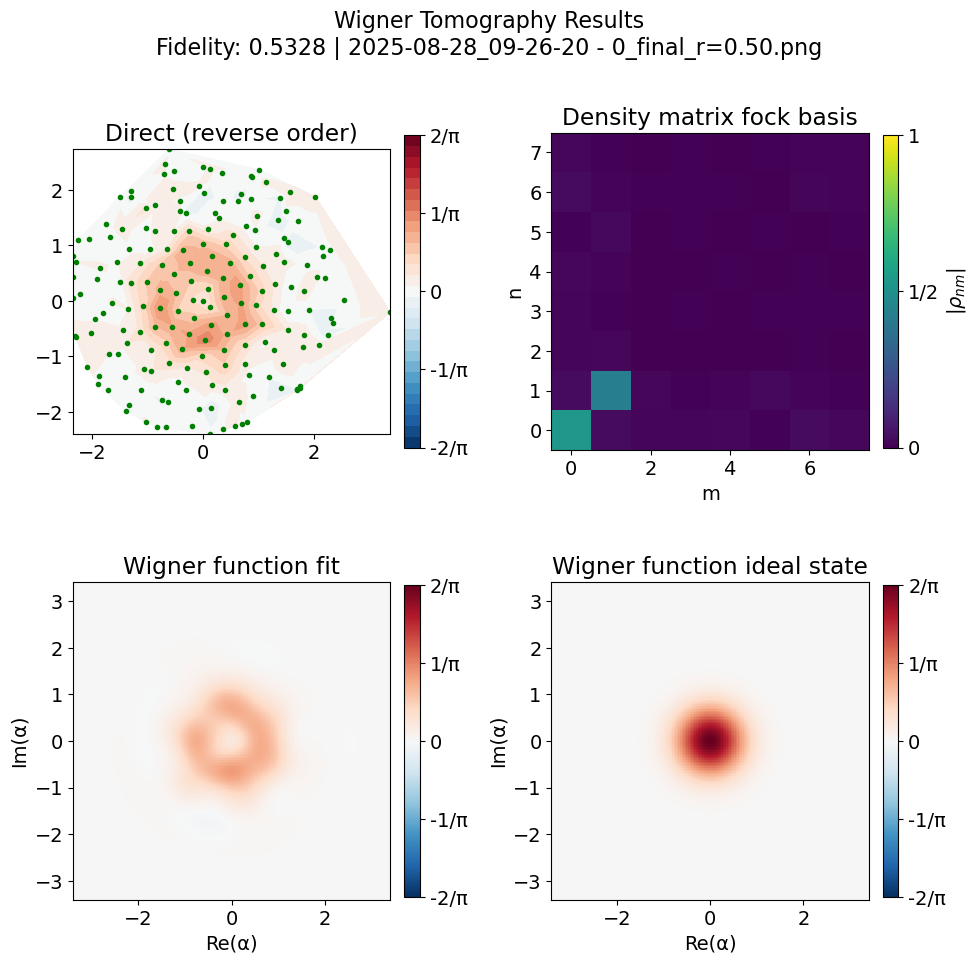

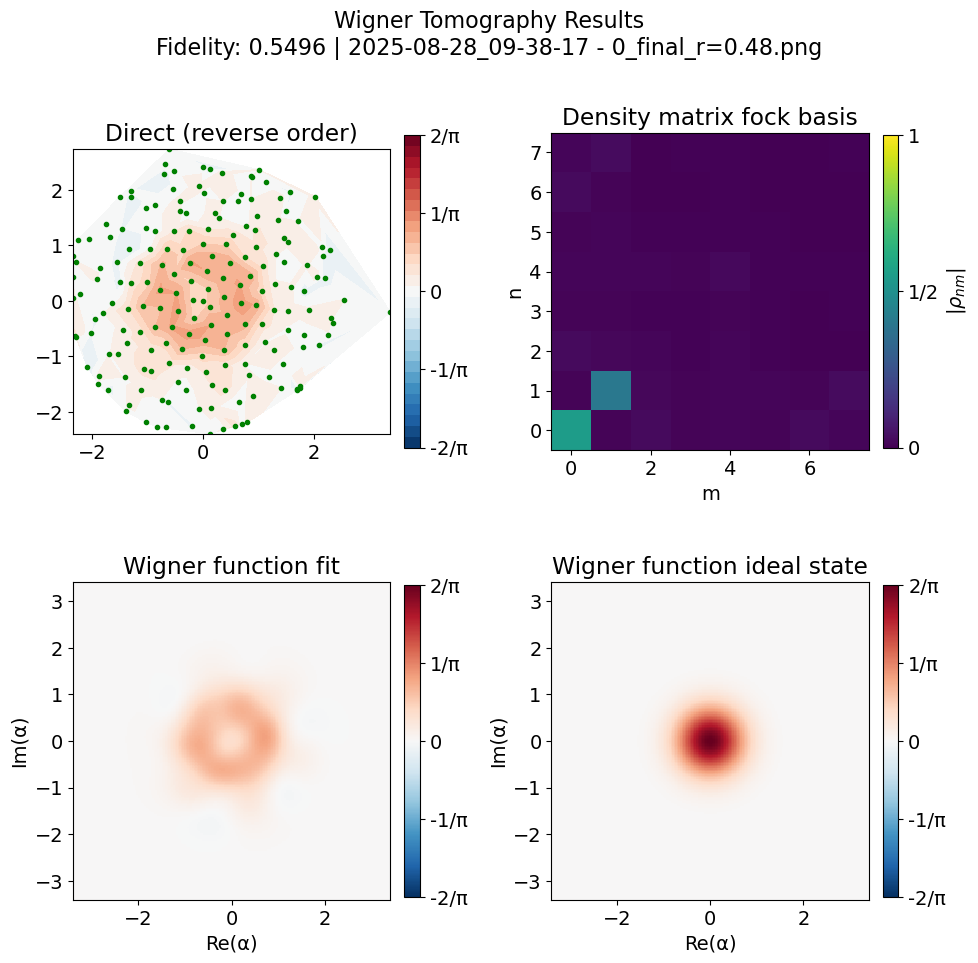

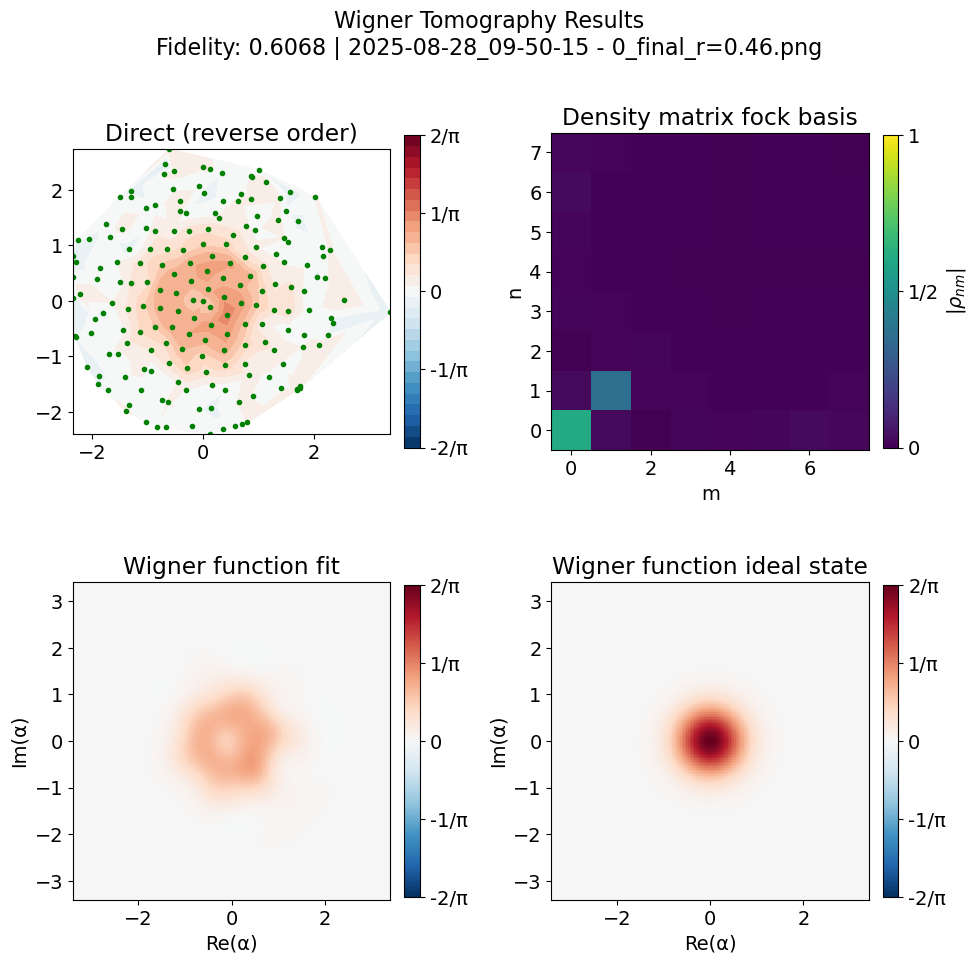

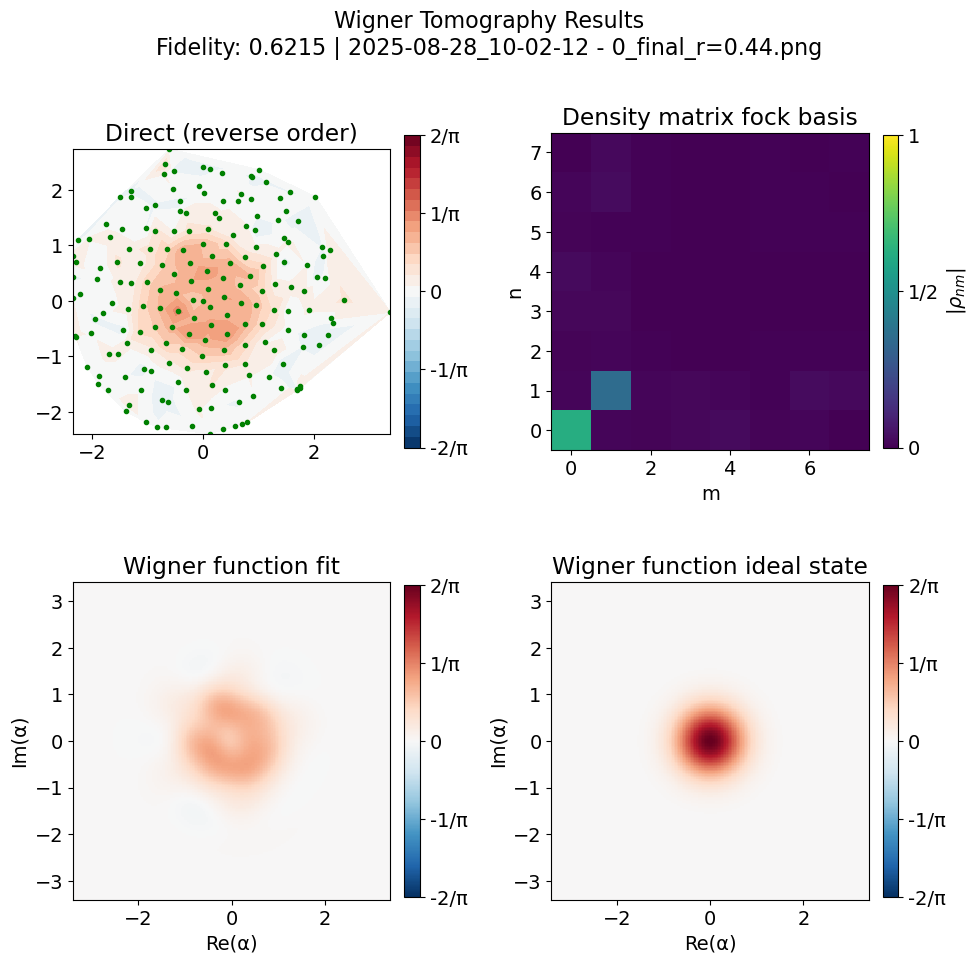

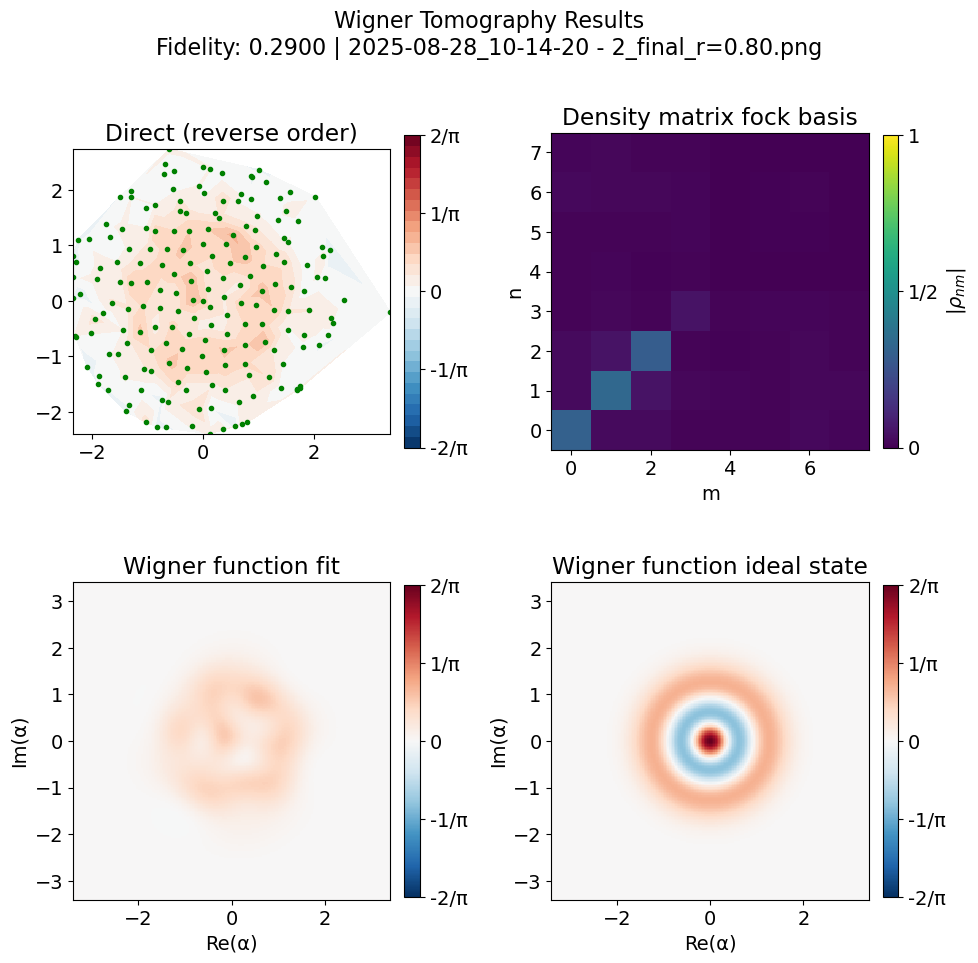

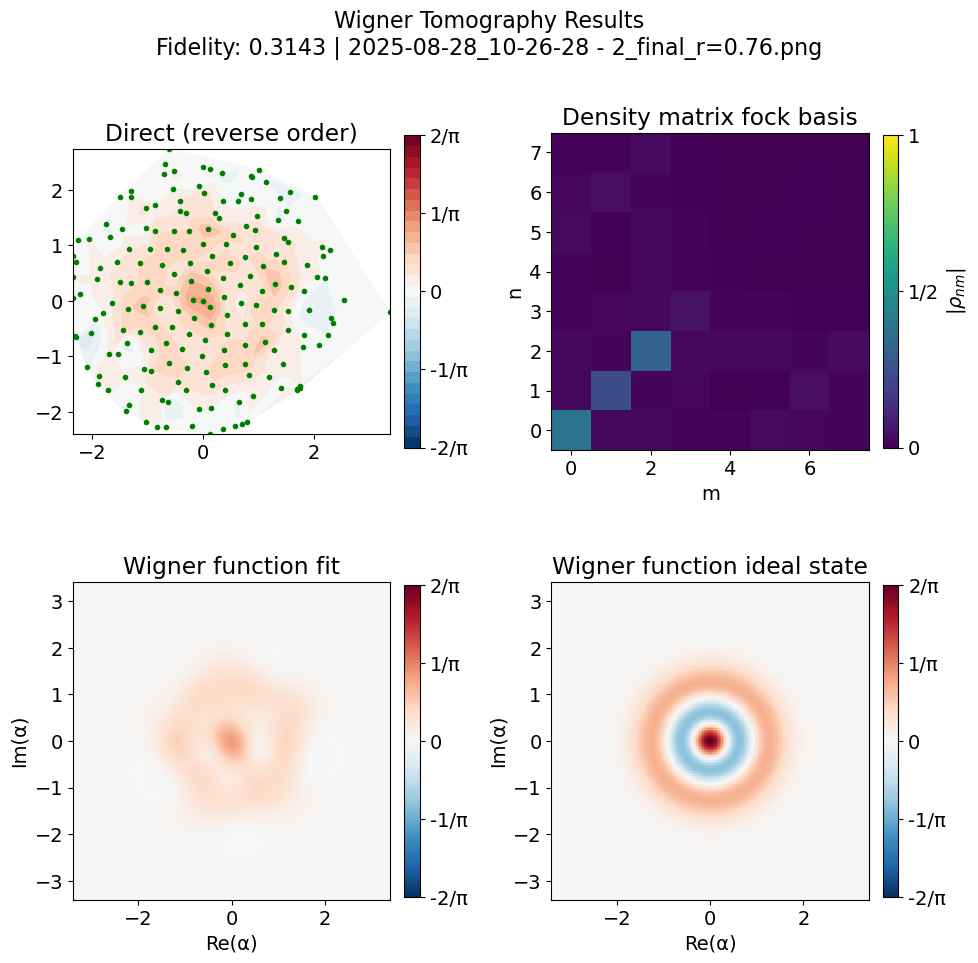

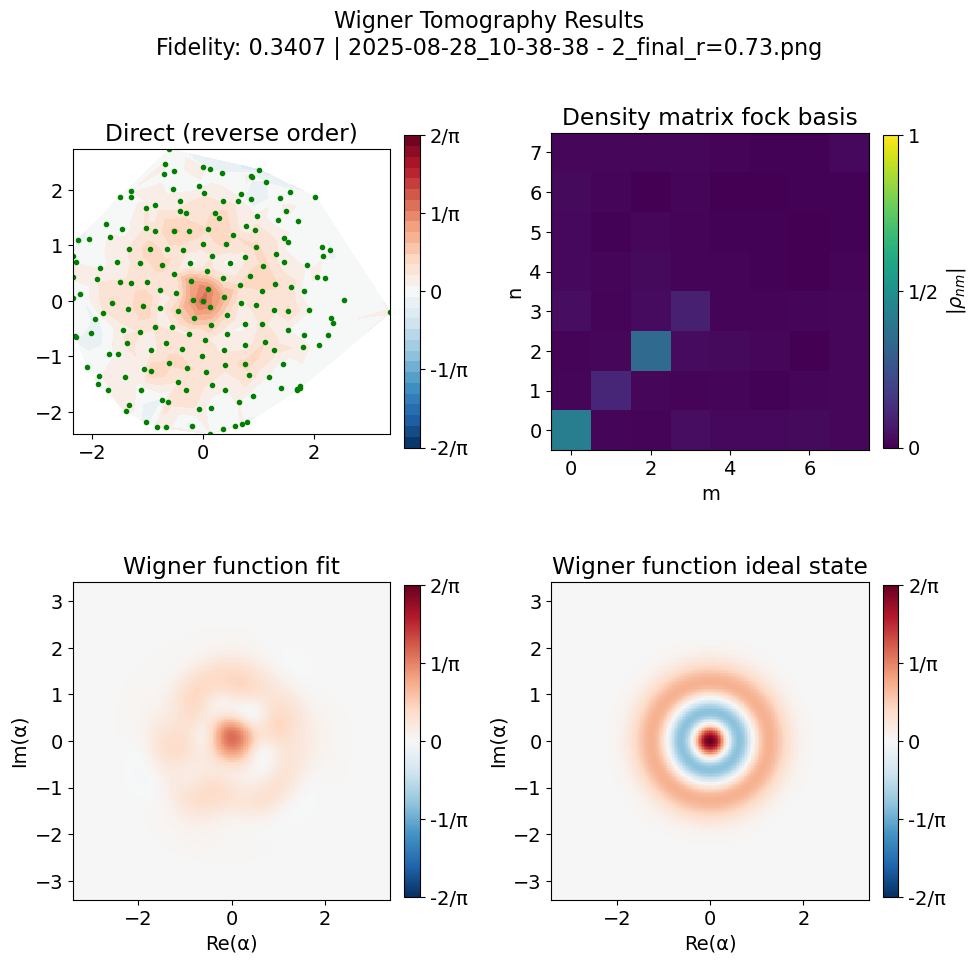

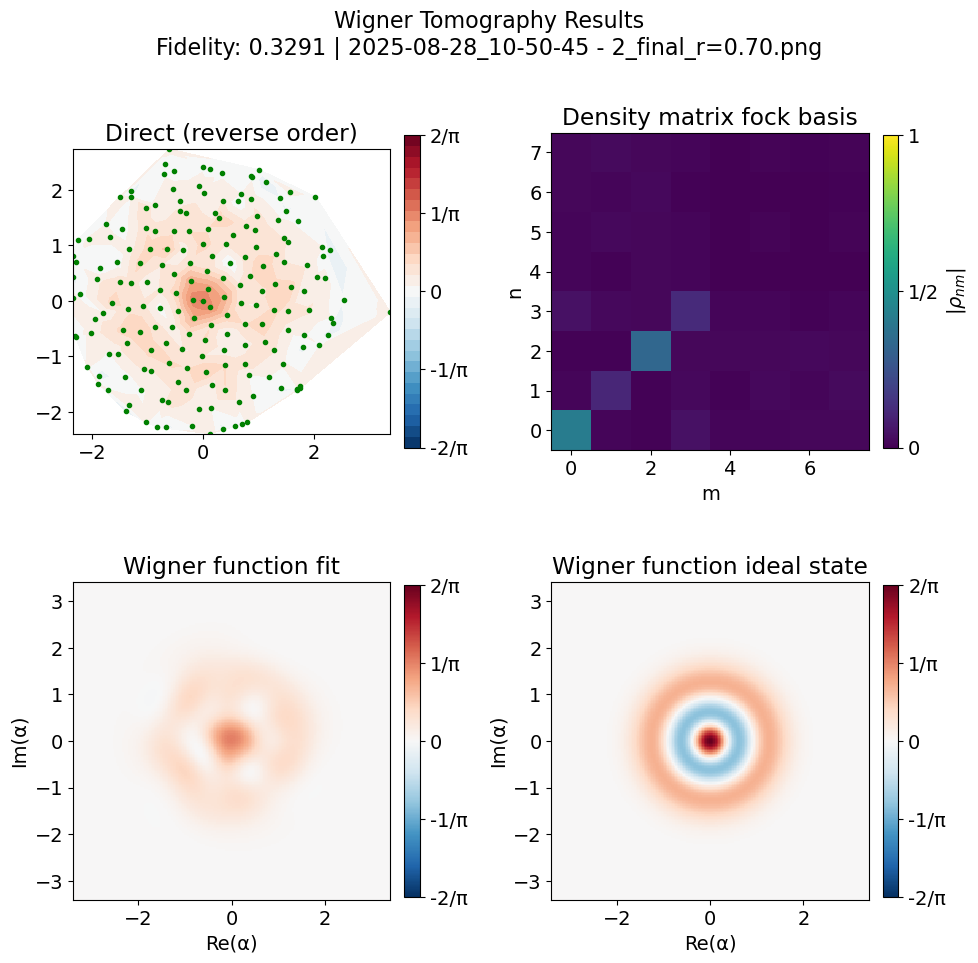

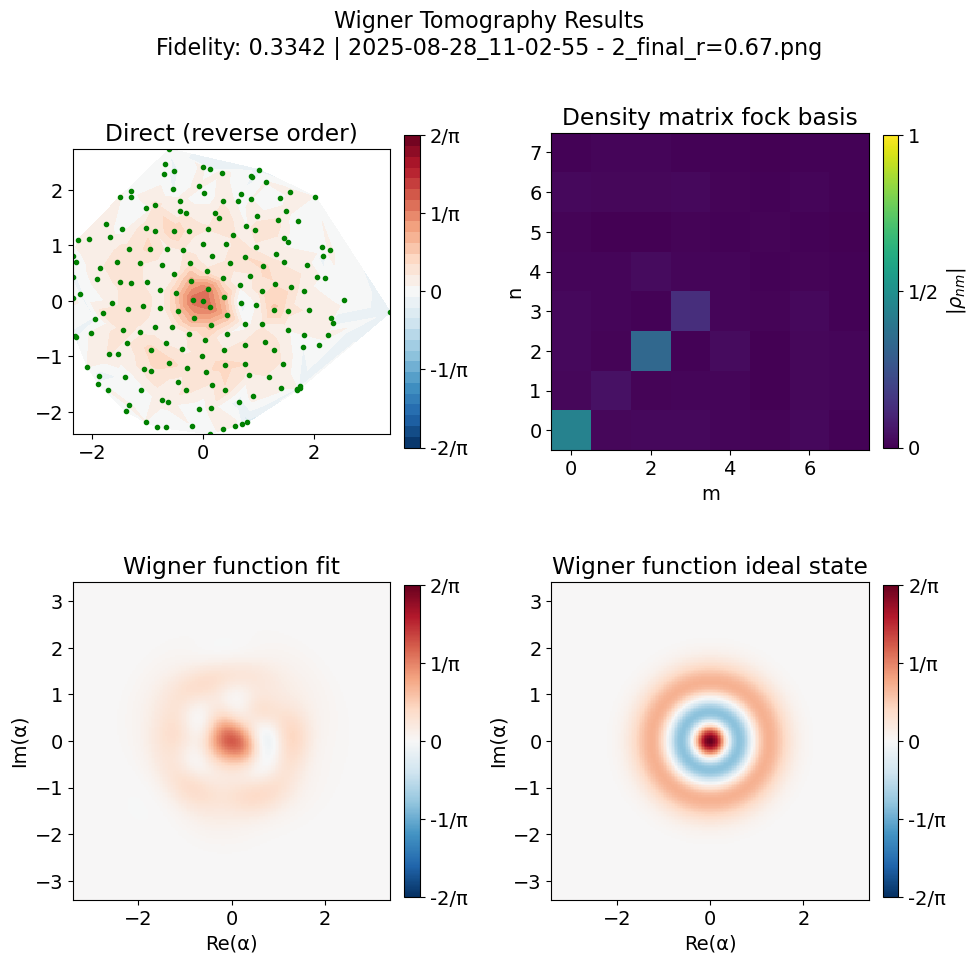

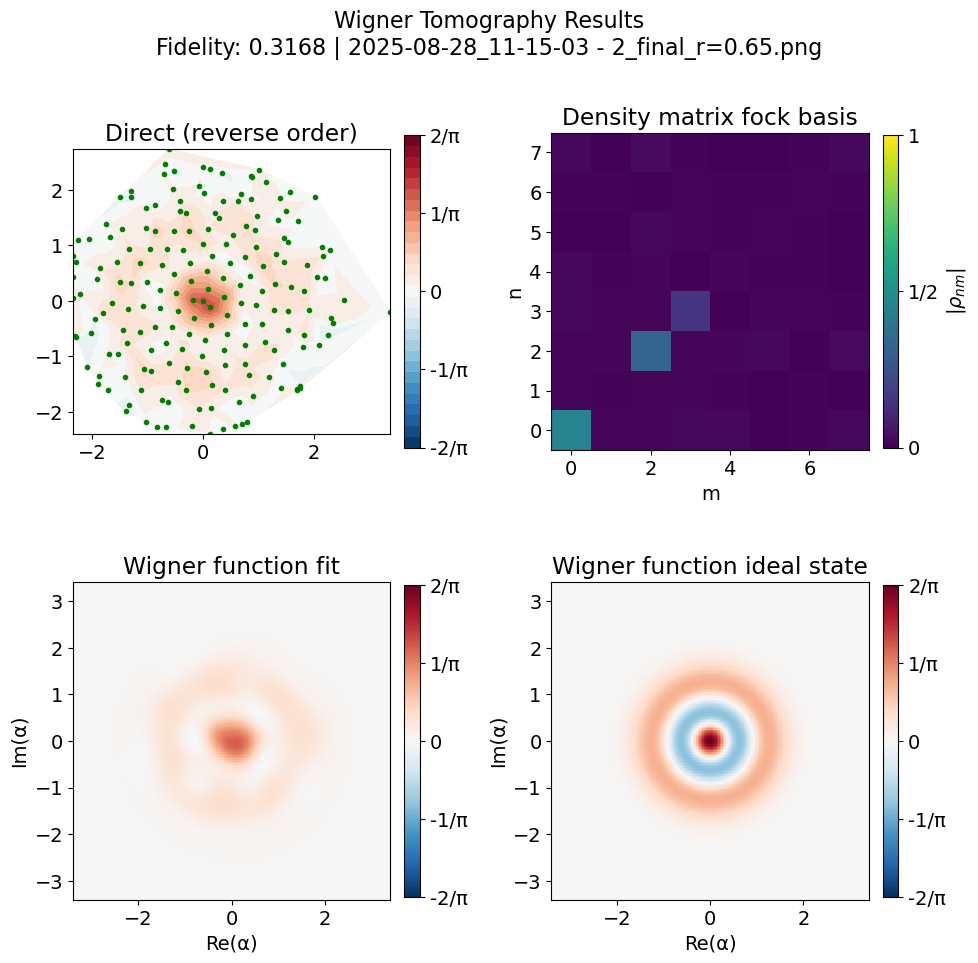

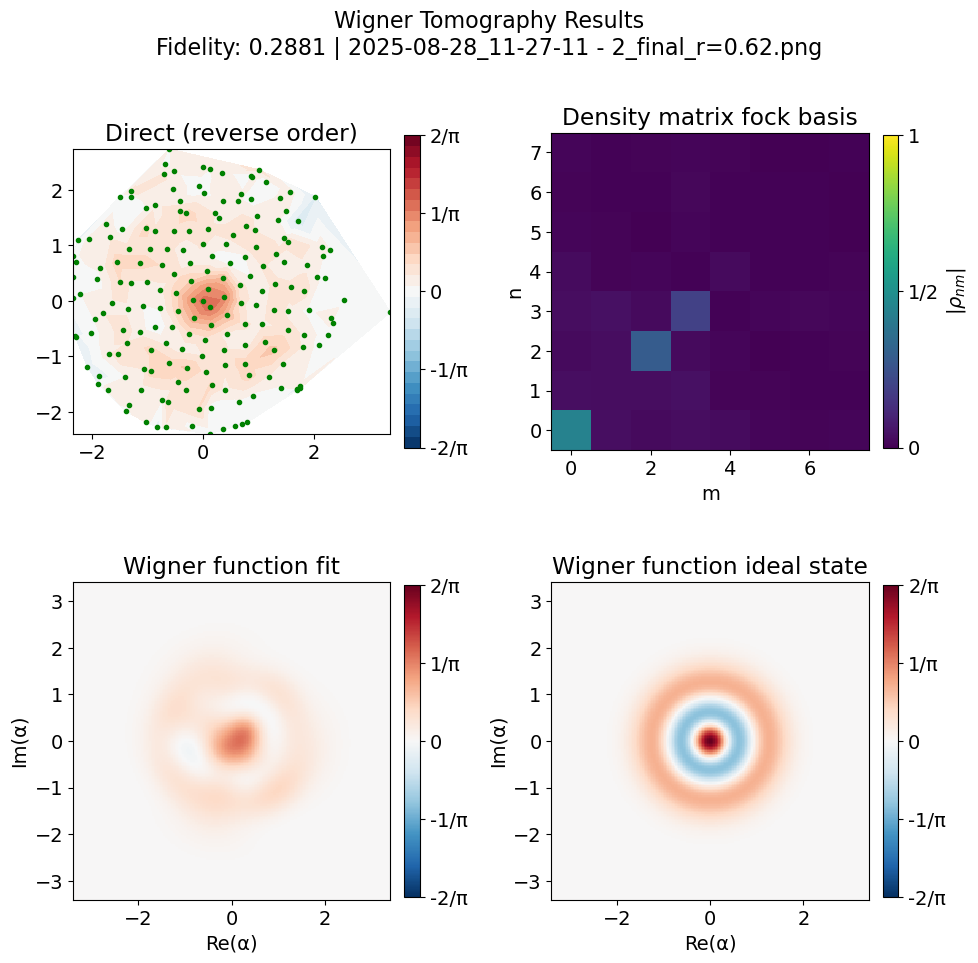

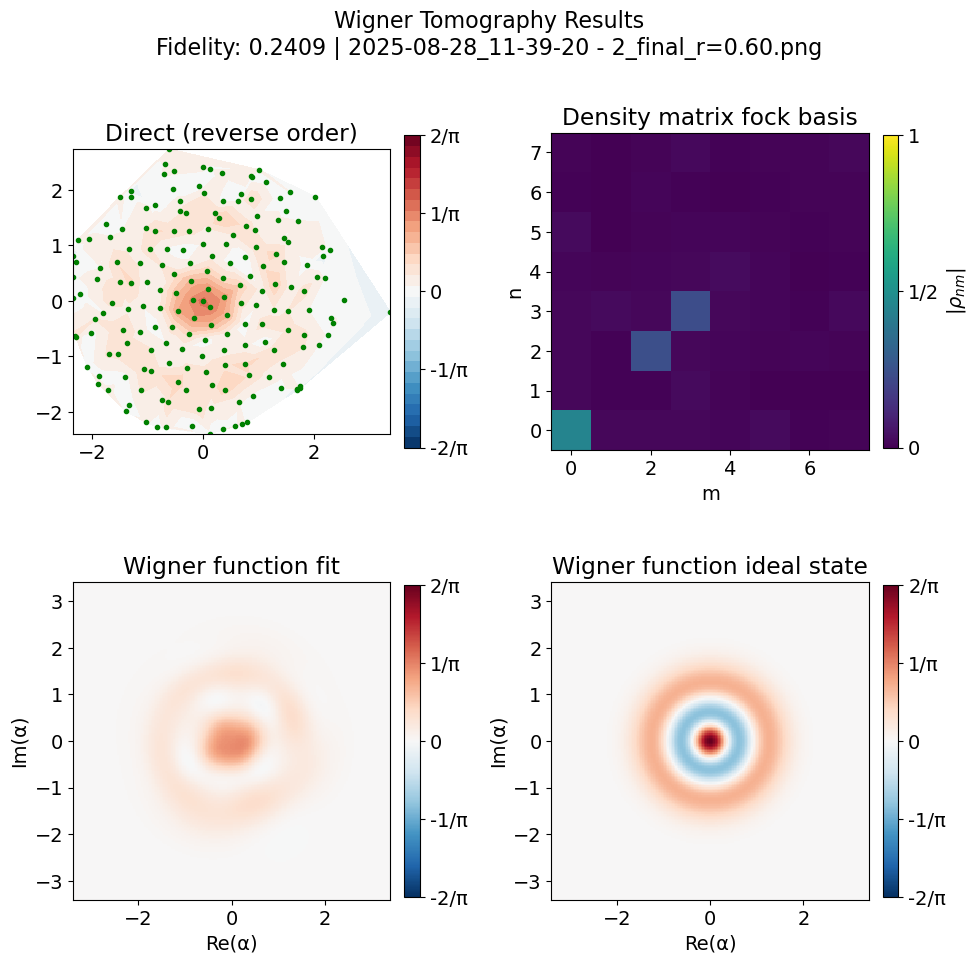

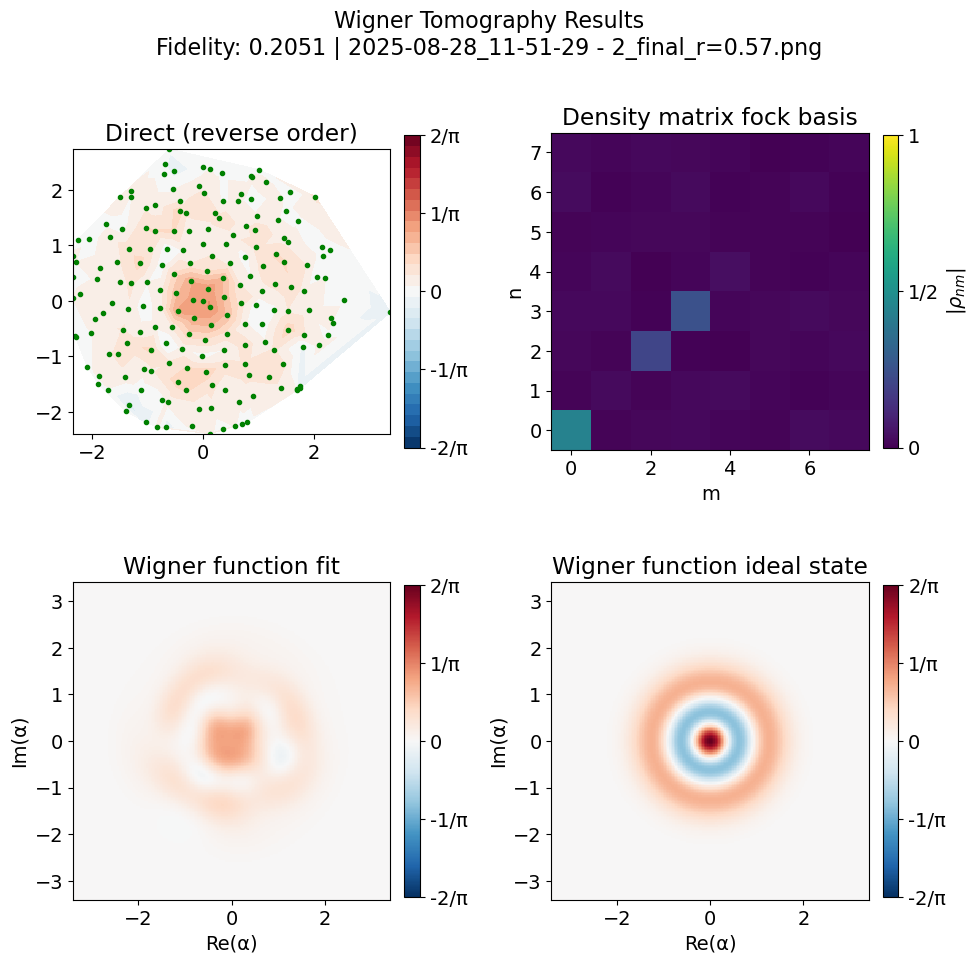

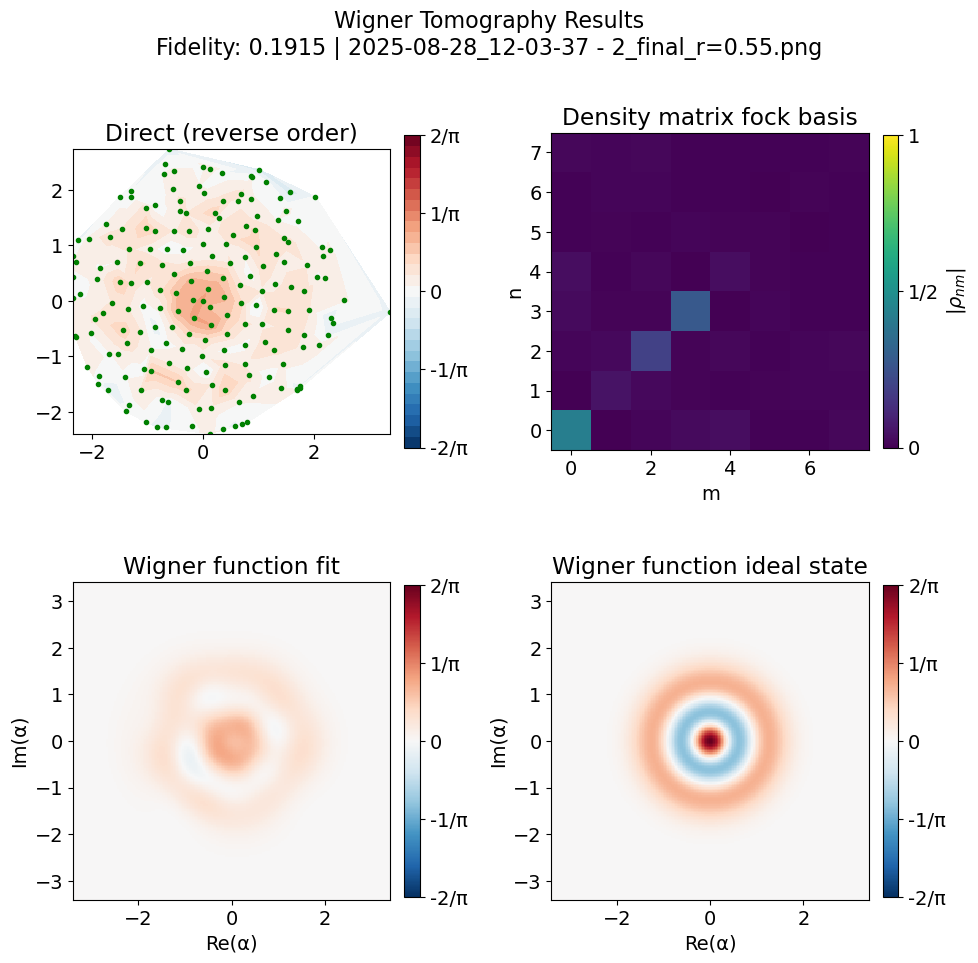

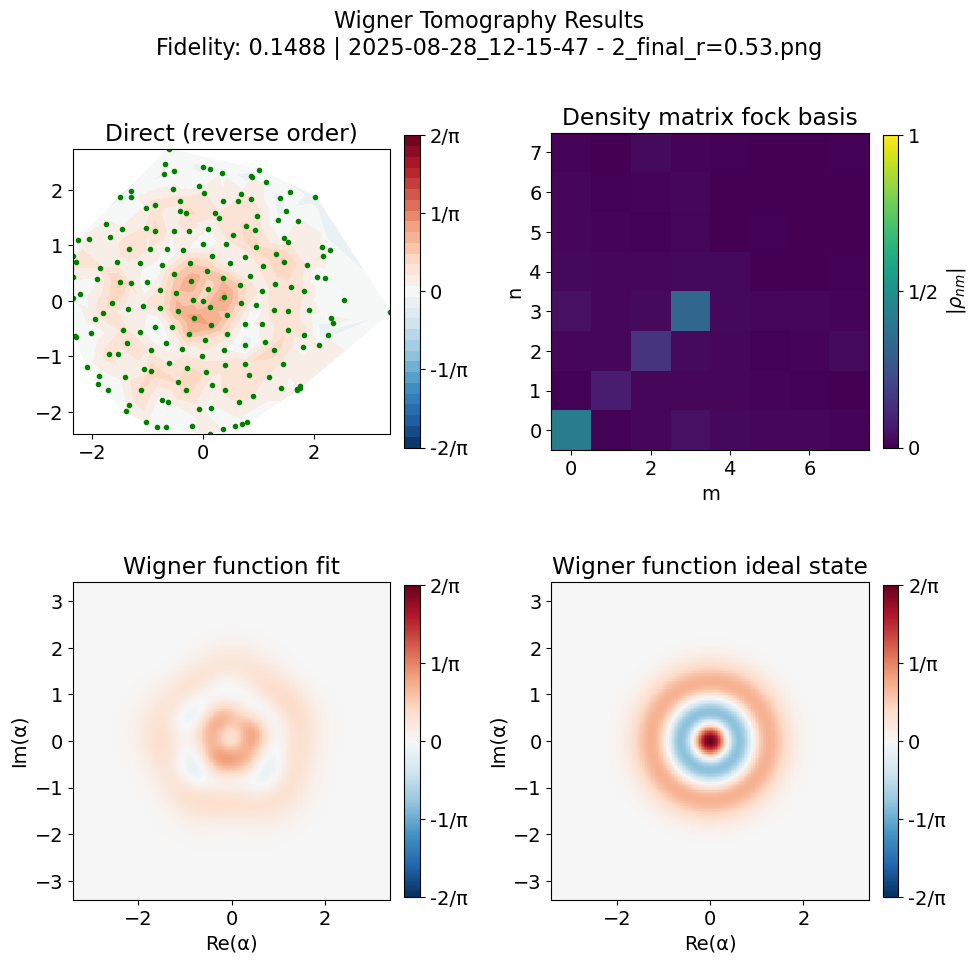

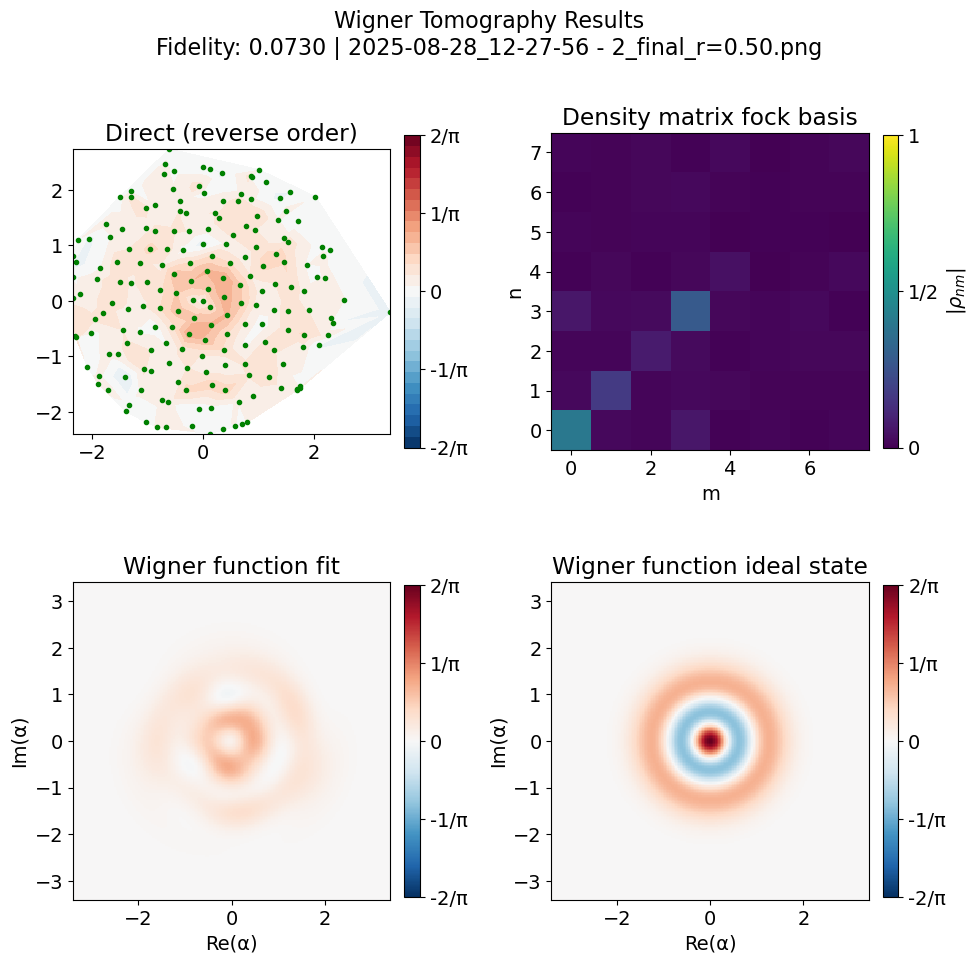

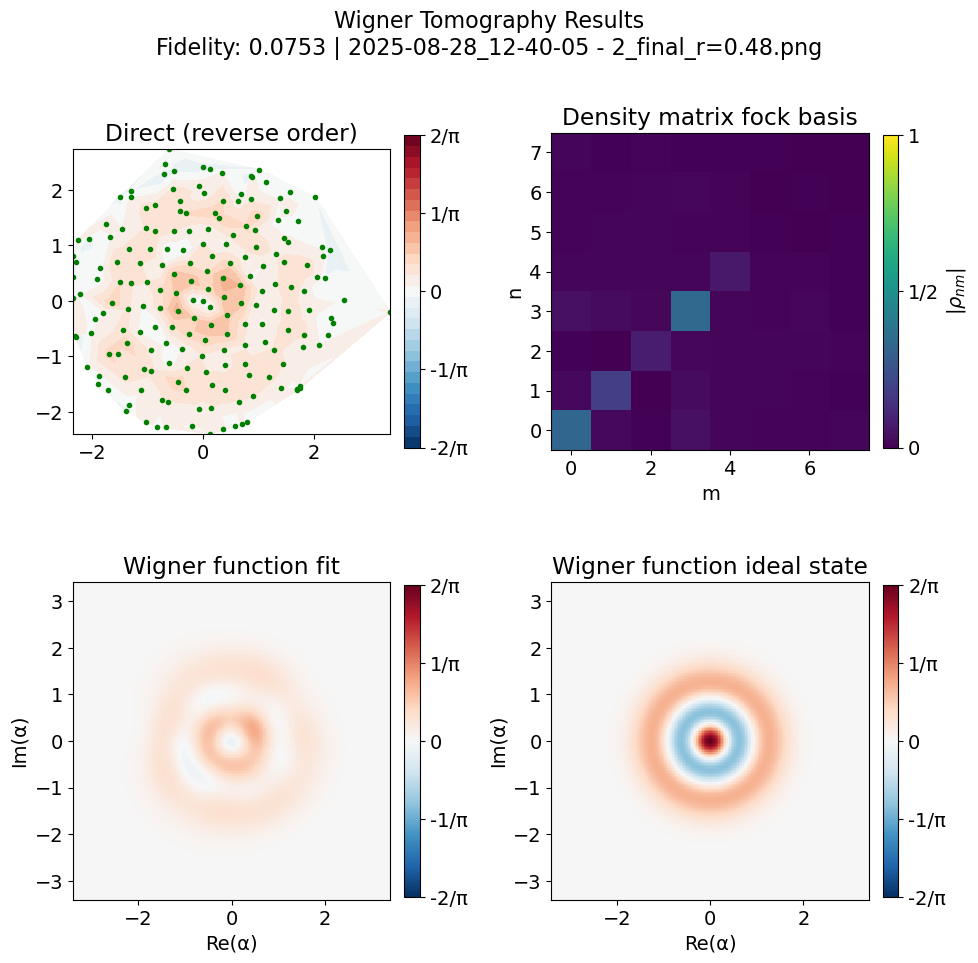

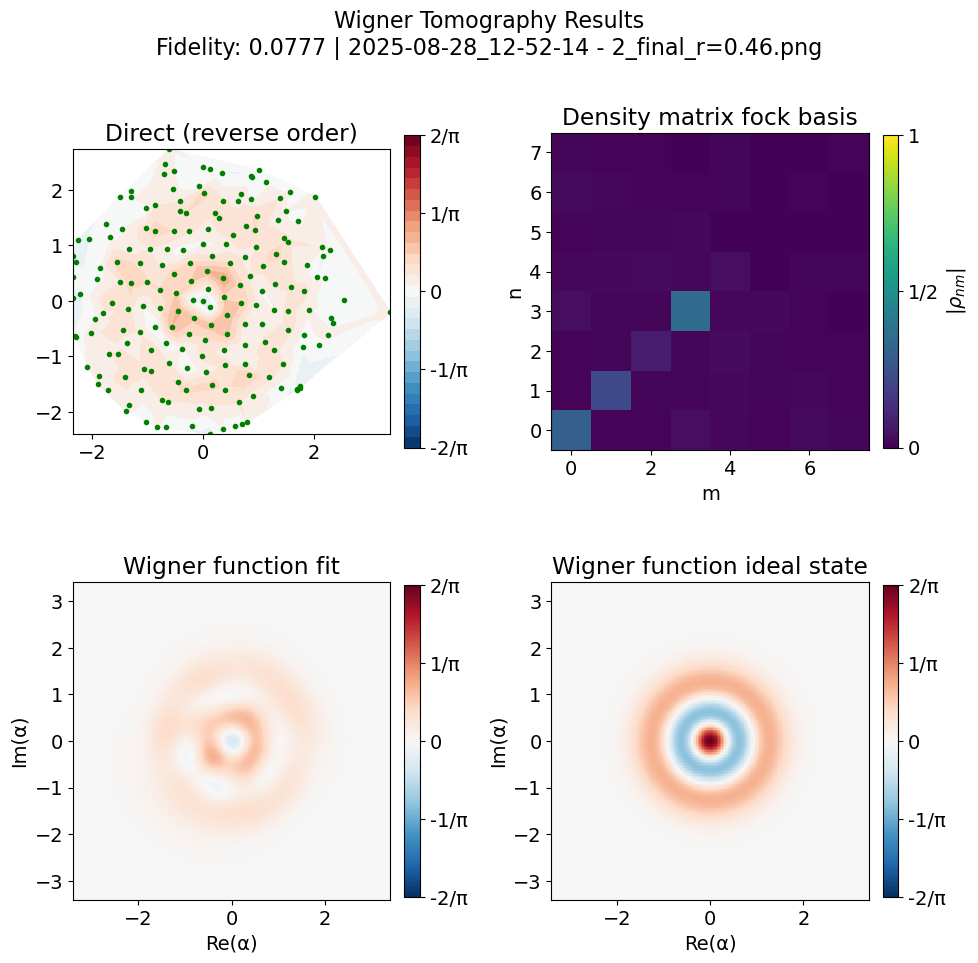

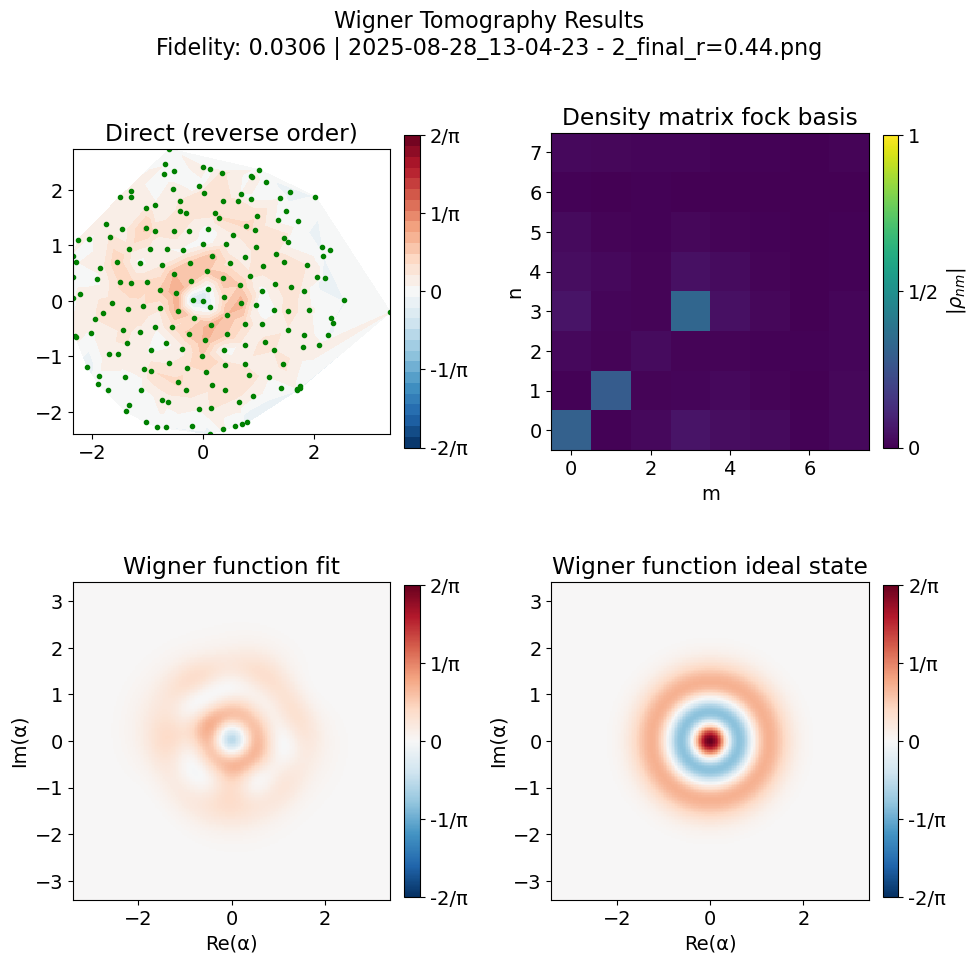

In [640]:
wigner_data_after = [[], [], [], []]
# for j in tqdm(range(2,len(prepulse_after))):
for j in tqdm(range(0,2)):
    prepulse = mm_base_calib.get_prepulse_creator(prepulse_after[j], cfg=expts_base_inst.config_thisrun).pulse.tolist()
    print(f'Prepulse {j}: {prepulse}')
    pulse_length = prepulse[2][-1]
    for r in range(len(ratio)):
    # update the pulse length 
        prepulse[2][-1] = pulse_length*ratio[r]
        print(prepulse[2][-1])
        wigner = do_wigner_tomography_1mode(
            config_thisrun=expts_base_inst.config_thisrun,
            expt_path=expts_base_inst.expt_path,
            config_path=expts_base_inst.config_file,
            displace_length=0.05,
            reps = 250,
            displacement_path=return_dict['path'], #optimal displacement path
            prepulse=True,
            pre_sweep_pulse=prepulse,
            gate_based = False,
            pulse_correction=True,
            relax_delay=7000, 
            post_select_pre_pulse=False,
        )
        wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg,
                                          mode_state_num=8, alphas = wigner.data['alpha'])
        results = wigner_analysis.wigner_analysis_results(wigner.data['parity'],
                                                           initial_state=initial_start_qt[j], rotate=True)
        # add the the keys of results to wigner.data
        for key in results:
            if key != 'wigner_analysis':
                wigner.data[key] = results[key].full() if isinstance(results[key], qt.Qobj) else results[key]

        wigner.data['pulse_length'] = prepulse[2][-1]
        wigner.data['eta'] = eta_vec[r]
        # wigner.data['state_label'] = np.array([state_labels[j]])
        
        
        wigner.save_data()
        fig = wigner_analysis.plot_wigner_reconstruction_results(results,
                                                                    initial_state=initial_start_qt[j],
                                                                    state_label = state_labels[j] + f' final r={ratio[r]:.2f}')
        wigner_data_after[j].append(wigner.data)
        


## Swap against fidelity

In [ ]:
## Checking code
# stor = 7 #storage number from 1
# fock_n = 5 #fock numbers from 0
# swap_iter = 6 #even swaps from 0
# swaps_plot = [2*i for i in range(swap_iter)]


# for k in range(stor): #storage number
#     fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

#     for j in range(fock_n): #fock states 0 to 4
#         photon = j
#         fid_results = []
        
#         for i in range(swap_iter): #even no. of swaps from 0 to 10
#             swaps = 2*i
#             fid_results += [swaps+j+k]

#         print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
#         print(fid_results)
#         print(swaps_plot)
#         fock_dict['fock_'+str(j)].append(fid_results)

#     print(f'Storage {k+1} swap fidelity results:')
#     print(fock_dict)
#     plt.figure(figsize=(10, 6))    
#     for l in range(fock_n):
#         fock_i = fock_dict['fock_'+str(l)][0]
#         plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(fock_n))
#     # plt.plot(indices, fock_0, marker='o', label='Fock 0')
#     plt.xlabel('Number of Swaps')
#     plt.ylabel('Fidelity')
#     plt.title(f'Fidelity vs Number of Swaps for Fock ' + str(j) + ' in Storage ' + str(k+1))
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()

In [ ]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
import matplotlib.pyplot as plt

stor = 7 #storage number from 1
fock_n = 5 #fock numbers from 0
swap_iter = 6 #even swaps from 0
swaps_plot = [2*i for i in range(swap_iter)]

for k in range(stor): #storage number
    fock_dict = {"fock_"+str(fock_n): [] for fock_n in range(fock_n)}

    for j in range(fock_n): #fock states 0 to 4
        photon = j
        fid_results = []
        
        for i in range(swap_iter): #even no. of swaps from 0 to 10
            swaps = 2*i
            prep_man_pi = mm_base_calib.prep_man_photon(man_no=1, photon_no=photon)
            for s in range(swaps):
                prep_man_pi.append(['storage', 'M1-S'+str(k+1), 'pi', 0])  


            pulse = mm_base_calib.get_prepulse_creator(prep_man_pi).pulse.tolist()
            print(f'doing ' + str(swaps) + ' swaps for fock ' + str(photon) + ' in storage ' + str(k+1))
            wigner = do_wigner_tomography_1mode(
                config_thisrun=expts_base_inst.config_thisrun,
                expt_path=expts_base_inst.expt_path,
                config_path=expts_base_inst.config_file,
                displace_length=0.05,
                reps = 1000,
                displacement_path=return_dict['path'],
                prepulse=True,
                pre_sweep_pulse=pulse,
                gate_based = False,
                # relax_delay=8000
                relax_delay=5000
            )

            wigner_analysis = WignerAnalysis(wigner.data, config=wigner.cfg, mode_state_num=10, alphas = wigner.data['alpha'])
            initial_state = (fock(wigner_analysis.m, photon)).unit() 
            allocated_counts = wigner_analysis.bin_ss_data()
            p_e = allocated_counts # Probability of measuring the state |e
            p_g = 1 - allocated_counts  # Probability of measuring the state |g
            plt.plot(np.abs(wigner.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')
            results = wigner_analysis.wigner_analysis_results((p_g-p_e), initial_state=initial_state, rotate=True)
            print(results['fidelity'])
            fid_results += [results['fidelity']]
            

        print(f'Fidelity-swap results for fock ' +str(j) + ' in storage ' + str(k+1) + ':')
        print(fid_results)
        print(swaps_plot)
        fock_dict['fock_'+str(j)].append(fid_results)

    print(f'Storage {k+1} swap fidelity results:')
    print(fock_dict)
    plt.figure(figsize=(10, 6))    
    for l in range(fock_n):
        fock_i = fock_dict['fock_'+str(l)][0]
        plt.plot(swaps_plot, fock_i, marker='o', label='Fock ' + str(l))
    plt.xlabel('Number of Swaps')
    plt.ylabel('Fidelity')
    plt.title(f'Fidelity vs Number of Swaps for in Storage ' + str(k+1))
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    # filename = title.replace(' ', '_').replace(':', '') + '.png'
    # self.save_plot(fig, filename=filename)

## Wigner Tomography of |0+2>

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)
prep_02_pulse = []
prep_02_pulse.append(['qubit', 'ge', 'hpi', 0]) # g0 + e0 
prep_02_pulse.append(['qubit', 'ef', 'pi', 0]) # g0 + f0 
prep_02_pulse.append(['qubit', 'ge', 'pi', 0])# e0 + f0
prep_02_pulse.append(['multiphoton', 'f0-g1', 'pi', 0]) # e0 + g1 
prep_02_pulse.append(['multiphoton', 'g0-e0', 'pi', 0]) # g0 + e1
prep_02_pulse.append(['multiphoton', 'e1-f1', 'pi', 0]) # g0 + f1 
prep_02_pulse.append(['multiphoton', 'f1-g2', 'pi', 0]) # g0 + g2
prep_02_pulse
## convert it to low level pulse 
pulse_02 = mm_base_dummy.get_prepulse_creator(prep_02_pulse).pulse.tolist()
pulse_02

## Wigner Tomography of |0> + |1>

### Debugging

##### Histogram Prepulse

In [ ]:
def do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    active_reset=False,
    man_reset=True,
    storage_reset=True,
    prepulse=False,
    pre_sweep_pulse=None,
    gate_based=True,
    preloaded_pulses=False,
    use_arb_waveform=False,
    expts_base_inst=None,
    expt_path=None,
    config_path=None,
    config_thisrun=None,
    relax_delay=2500
):
    """
    Run the Histogram Prepulse Experiment with configurable parameters.
    """
        
    expt_cfg = {
        'reps': reps,
        'qubits': qubits,
        'active_reset': active_reset,
        'man_reset': man_reset,
        'storage_reset': storage_reset,
        'prepulse': prepulse,
        'pre_sweep_pulse': pre_sweep_pulse,
        'gate_based': gate_based,
        'preloaded_pulses': preloaded_pulses,
        'use_arb_waveform': use_arb_waveform
    }
    histogram_exp = expts_base_inst.meas.single_qubit.single_shot_prepulse.HistogramPrepulseExperiment(
        soccfg=expts_base_inst.soc, path=expt_path, prefix='HistogramPrepulseExperiment', config_file=config_path
    )
    histogram_exp.cfg = AttrDict(deepcopy(config_thisrun))
    histogram_exp.cfg.expt = expt_cfg
    histogram_exp.go(analyze=False, display=False, progress=True, save=True)
    return histogram_exp


In [ ]:
historgam_exp = do_histogram_prepulse_experiment(
    reps=10000,
    qubits=[0],
    expts_base_inst=expts_base_inst,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    config_thisrun=expts_base_inst.config_thisrun,
    prepulse=True,
    gate_based=True,
    pre_sweep_pulse=[['qubit', 'ge', 'hpi', 0]],  # Use the prepulse pulse created above
)

In [ ]:
historgam_exp.data['I'].shape

In [ ]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = historgam_exp.data['I']
y = historgam_exp.data['Q']



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -314
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

In [ ]:
# choose alphas along 3 axes 
alpha_list = np.linspace(0, 1, 10) 
phase_across_three_axes = np.array([0, 90, 180])  # in degrees
alphas = []
for phase in phase_across_three_axes:
    alphas.append(alpha_list * np.exp(1j * np.deg2rad(phase)))
alpha_list_full = np.concatenate(alphas)
alpha_list_full
f_path = expts_base_inst.expt_path + '\\alphas.npy'
np.save(f_path, alpha_list_full)


In [ ]:
alpha_list_full

In [ ]:
# Now doing wigner tomography at these 3 points of 0 + 1
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 5000,
    displacement_path=f_path,
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False,
    relax_delay=2500
)

In [ ]:
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=10, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g
wigner_expec = 2/np.pi * (p_g - p_e)  # Wigner expectation value

In [ ]:
wigner_expec

In [ ]:
import numpy as np

wigner_exp_01.data['alpha']
# the array above contains alphas along the three axes, for each axes plot the corresponding wigner exppec
# I expec 3 traces on a single plot, one for each angle 
import matplotlib.pyplot as plt

alphas = wigner_exp_01.data['alpha']
wigner_expec = 2/np.pi * (p_g - p_e)

# There are 3 axes, so split the data accordingly
num_axes = 3
N = len(alphas) // num_axes

plt.figure(figsize=(7, 5))
for i, phase in enumerate(phase_across_three_axes):
    idx = slice(i*N, (i+1)*N)
    print(idx)
    plt.plot(np.abs(alphas[idx]), wigner_expec[idx], 'o-', label=f'Phase {phase}°')
plt.xlabel('|α|')
plt.ylabel('Wigner expectation')
plt.title('Wigner expectation along three axes')
plt.legend()
plt.show()

In [ ]:
np.shape(wigner_exp_01.data['i0'])

In [ ]:
from matplotlib import gridspec


# i, q
# plt.plot(wigner_exp_01.data['i0'][0][0], wigner_exp_01.data['q0'][0][0], 'o', markersize=2, color='black')
# Plot histograms along x and y axes

# Get data
x = wigner_exp_01.data['i0'][0][0]
y = wigner_exp_01.data['q0'][0][0]



# Create a figure with gridspec for scatter and histograms
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4],
                       wspace=0.05, hspace=0.05)

ax_scatter = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

# Scatter plot
ax_scatter.plot(x, y, 'o', markersize=2, color='black')
ax_scatter.set_xlabel('i0')
ax_scatter.set_ylabel('q0')

# X histogram
ax_histx.hist(x, bins=40, color='gray')
ax_histx.axis('off')

# Y histogram
ax_histy.hist(y, bins=40, orientation='horizontal', color='gray')
ax_histy.axis('off')

threshold = -300
below_threshold = x < threshold
proportion_below = np.sum(below_threshold) / len(x)
print(f"Proportion of points below threshold {threshold}: {proportion_below:.3f} ({np.sum(below_threshold)}/{len(x)})")

# Plot threshold line and highlight points below threshold
ax_scatter.axvline(threshold, color='red', linestyle='--', label=f'Threshold {threshold}')
ax_scatter.plot(x[below_threshold], y[below_threshold], 'ro', markersize=3, label='Below threshold')
ax_scatter.legend()

plt.show()

In [ ]:
# 

In [ ]:
wigner_exp_01.cfg.device.readout

### Normal

In [ ]:
from MM_dual_rail_base import MM_dual_rail_base
mm_base_dummy = MM_dual_rail_base(expts_base_inst.config_thisrun)

prep_01_pulse = [['qubit', 'ge', 'hpi', 0], # g0 + e0 
['qubit', 'ef', 'pi', 0], # g0 + f0 
['multiphoton', 'f0-g1', 'pi', 0]] # e0 + g1 
## convert it to low level pulse 
pulse_01 = mm_base_dummy.get_prepulse_creator(prep_01_pulse).pulse.tolist()
pulse_01

In [ ]:
wigner_exp_01 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 1000,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_01,
    gate_based = False
)

In [ ]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_01.data, config=wigner_exp_01.cfg, mode_state_num=2, alphas = wigner_exp_01.data['alpha'])
initial_state = (fock(wigner_analysis.m, 1)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

In [ ]:
plt.plot(np.abs(wigner_exp_01.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

In [ ]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+1')

In [ ]:
wigner_exp_02 = do_wigner_tomography_1mode(
    config_thisrun=expts_base_inst.config_thisrun,
    expt_path=expts_base_inst.expt_path,
    config_path=expts_base_inst.config_file,
    displace_length=0.05,
    reps = 200,
    displacement_path=return_dict['path'],
    prepulse=True,
    pre_sweep_pulse=pulse_02,
    gate_based = False
)

In [ ]:
from fitting_folder.wigner import WignerAnalysis
from qutip import fock  
from slab import AttrDict
wigner_analysis = WignerAnalysis(wigner_exp_02.data, config=wigner_exp_02.cfg, mode_state_num=10, alphas = wigner_exp.data['alpha'])
initial_state = (fock(wigner_analysis.m, 2)  + fock(wigner_analysis.m, 0)).unit() # Initial state |0> ?? 1,2, o4 [1,2]
allocated_counts = wigner_analysis.bin_ss_data()
p_e = allocated_counts # Probability of measuring the state |e
p_g = 1 - allocated_counts  # Probability of measuring the state |g

In [ ]:
plt.plot(np.abs(wigner_exp_02.data['alpha']), (p_g-p_e), 'o', markersize=2, color='black')

In [ ]:
results = wigner_analysis.wigner_analysis_results((p_g -p_e), initial_state=initial_state)
fig = wigner_analysis.plot_wigner_reconstruction_results(results, initial_state=initial_state, state_label = '0+2')

In [ ]:
expts_base_inst.soc.deg2reg(180, 0)

In [ ]:
expts_base_inst.soc.deg2reg(180)

In [ ]:
from qutip import wigner, fock, displace
import numpy as np
from matplotlib.ticker import MultipleLocator, FuncFormatter

import matplotlib.pyplot as plt




# Define parameters
N = 15  # Hilbert space dimension
n = 2 # Fock state |n>
xvec = np.linspace(-3, 3, 200)
yvec = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(xvec, yvec)
alpha = X + 1j * Y

# Create Fock state
psi = fock(N, n)

# Compute Wigner function
W = wigner(psi, xvec, yvec)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
c = ax.pcolormesh(X, Y, W, cmap='RdBu_r', shading='auto', vmin=-2/np.pi, vmax=2/np.pi)
ax.set_xlabel('Re(α)')
ax.set_ylabel('Im(α)')
ax.set_title(f'Wigner function for Fock state |{n}>')
cb = fig.colorbar(c, ax=ax)
cb.set_label('Wigner function')
cb.set_ticks([-2/np.pi, 0, 2/np.pi])
plt.show()

# Save Config

In [ ]:
expts_base_inst.config_thisrun

In [ ]:
expts_base_inst.recursive_compare(expts_base_inst.yaml_cfg, expts_base_inst.config_thisrun)

In [ ]:
expts_base_inst.config_thisrun

In [ ]:
expts_base_inst.handle_config_update(updateConfig_bool=True)